In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# prompt: Read the CSV 'application_train.csv' into a dataframe

import pandas as pd

df = pd.read_csv('application_train.csv')
df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
# prompt: make another where target variable TARGET is excluded

X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [ ]:
# Data shape and info
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("Original class distribution:", Counter(y))


Data Shape: (307511, 122)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Descriptive Statistics:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05 

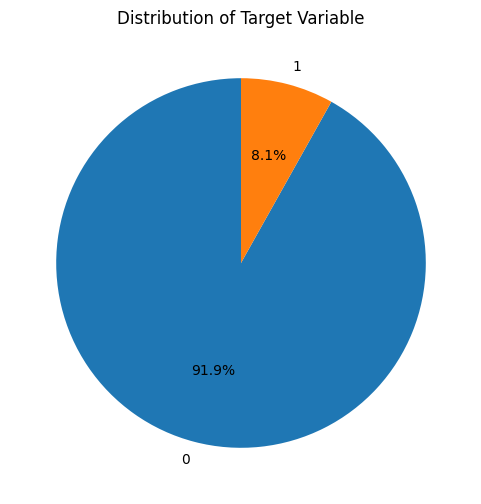

In [ ]:
# prompt: make a pie chart showing distribution of target variable

target_counts = df['TARGET'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.show()

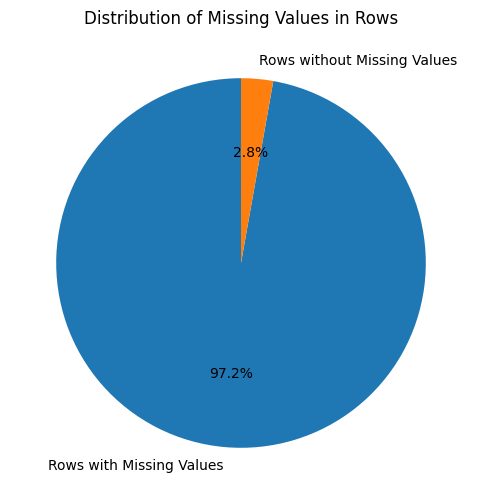

In [ ]:
# prompt: Make a pie chart showing entries with missing values (not per feature)

import matplotlib.pyplot as plt

# Calculate the number of rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
rows_without_missing = df.shape[0] - rows_with_missing

# Create a pie chart
labels = ['Rows with Missing Values', 'Rows without Missing Values']
sizes = [rows_with_missing, rows_without_missing]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Missing Values in Rows')
plt.show()

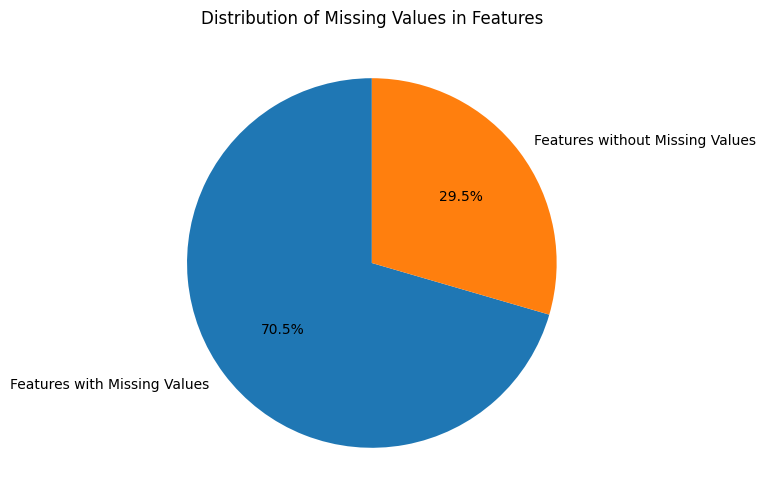

In [ ]:
# prompt: How many features do not have any missing values? Make it a pie chart

# Count features with no missing values
features_without_missing = df.isnull().sum()[df.isnull().sum() == 0].count()

# Create a pie chart
labels = ['Features with Missing Values', 'Features without Missing Values']
total_features = df.shape[1]
features_with_missing = total_features - features_without_missing
sizes = [features_with_missing, features_without_missing]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Missing Values in Features')
plt.show()

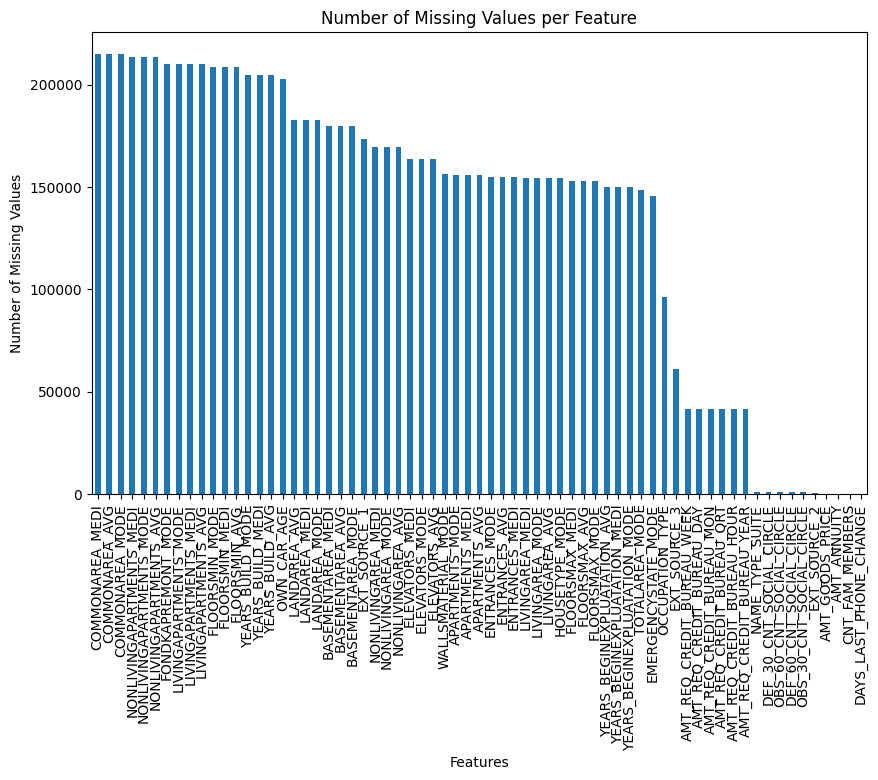

In [ ]:
# prompt: Make a bar chart showing entries with missing values

missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

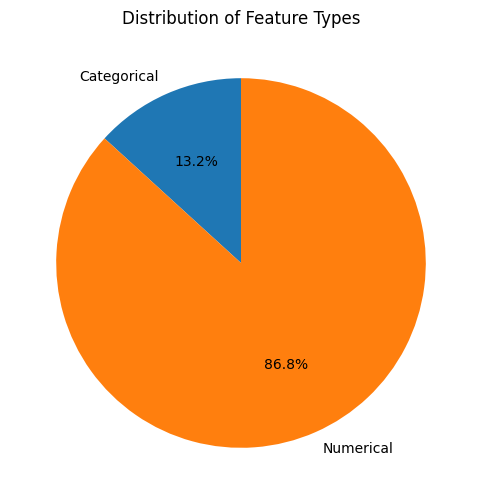

In [ ]:
# prompt: Identify how many of the features (y) are categorical and show that in a pie chart

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Count the number of categorical features
num_categorical_features = len(categorical_features)

# Create a pie chart
labels = ['Categorical', 'Numerical']
sizes = [num_categorical_features, X.shape[1] - num_categorical_features]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Feature Types')
plt.show()

In [ ]:
# prompt: get len of df.select_dtypes(include=['number'])

len(df.select_dtypes(include=['number']).columns)

106

In [ ]:
correlation_matrix = numeric_df.corr()


In [ ]:
correlation_matrix

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000  0.000845     -0.001041   
TARGET                        0.000845  1.000000      0.019550   
CNT_CHILDREN                 -0.001041  0.019550      1.000000   
AMT_INCOME_TOTAL             -0.002789 -0.000646      0.011775   
AMT_CREDIT                    0.001085 -0.030861      0.002200   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.000287  0.002310      0.000459   
AMT_REQ_CREDIT_BUREAU_WEEK    0.003824  0.000526     -0.000252   
AMT_REQ_CREDIT_BUREAU_MON    -0.002923 -0.013624     -0.011530   
AMT_REQ_CREDIT_BUREAU_QRT     0.000836 -0.001674     -0.012287   
AMT_REQ_CREDIT_BUREAU_YEAR    0.002845  0.018763     -0.039138   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.002789    0.001085     0.002775   
TARGET                             -0.000646   -0.030861    -0.011990   
CNT_CHILDREN                        0.011775    0.002200     0.022953   
AMT_INCOME_TOTAL                    1.000000    0.132093     0.161344   
AMT_CREDIT                          0.132093    1.000000     0.770481   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001945    0.003580     0.001342   
AMT_REQ_CREDIT_BUREAU_WEEK          0.001767   -0.002041     0.013771   
AMT_REQ_CREDIT_BUREAU_MON           0.020027    0.053647     0.038674   
AMT_REQ_CREDIT_BUREAU_QRT           0.003986    0.021305     0.015496   
AMT_REQ_CREDIT_BUREAU_YEAR          0.009245   -0.047618    -0.012735   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.000924                    0.002024   
TARGET                            -0.040043                   -0.038381   
CNT_CHILDREN                      -0.001905                   -0.025522   
AMT_INCOME_TOTAL                   0.134348                    0.062412   
AMT_CREDIT                         0.986955                    0.100030   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.003862                   -0.001313   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001225                   -0.005514   
AMT_REQ_CREDIT_BUREAU_MON          0.055300                    0.078069   
AMT_REQ_CREDIT_BUREAU_QRT          0.021597                   -0.004172   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050165                    0.001848   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.003552       0.003425  ...         -0.002977   
TARGET                        0.078448      -0.044159  ...         -0.007237   
CNT_CHILDREN                  0.330024      -0.239732  ...          0.002966   
AMT_INCOME_TOTAL              0.023437      -0.054481  ...          0.001676   
AMT_CREDIT                   -0.055226      -0.067696  ...          0.029915   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.003777      -0.000375  ...          0.015691   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000039       0.001144  ...         -0.003920   
AMT_REQ_CREDIT_BUREAU_MON     0.001345      -0.033359  ...         -0.000199   
AMT_REQ_CREDIT_BUREAU_QRT    -0.014338       0.017658  ...         -0.005775   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071850       0.050285  ...         -0.046460   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                         -0.003306         -0.001702   
TARGET                              0.000766         -0.000547   
CNT_CHILDREN                       -0.001293         -0.000730   
AMT_INCOME_TOTAL                    0.001571         -0.000012   
AMT_CREDIT                          0.019208          0.028805   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

In [ ]:
correlation_matrix['FLAG_MOBIL']

SK_ID_CURR                    0.003283
TARGET                        0.000672
CNT_CHILDREN                  0.001302
AMT_INCOME_TOTAL              0.000342
AMT_CREDIT                    0.001798
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          NaN
AMT_REQ_CREDIT_BUREAU_WEEK         NaN
AMT_REQ_CREDIT_BUREAU_MON          NaN
AMT_REQ_CREDIT_BUREAU_QRT          NaN
AMT_REQ_CREDIT_BUREAU_YEAR         NaN
Name: FLAG_MOBIL, Length: 106, dtype: float64

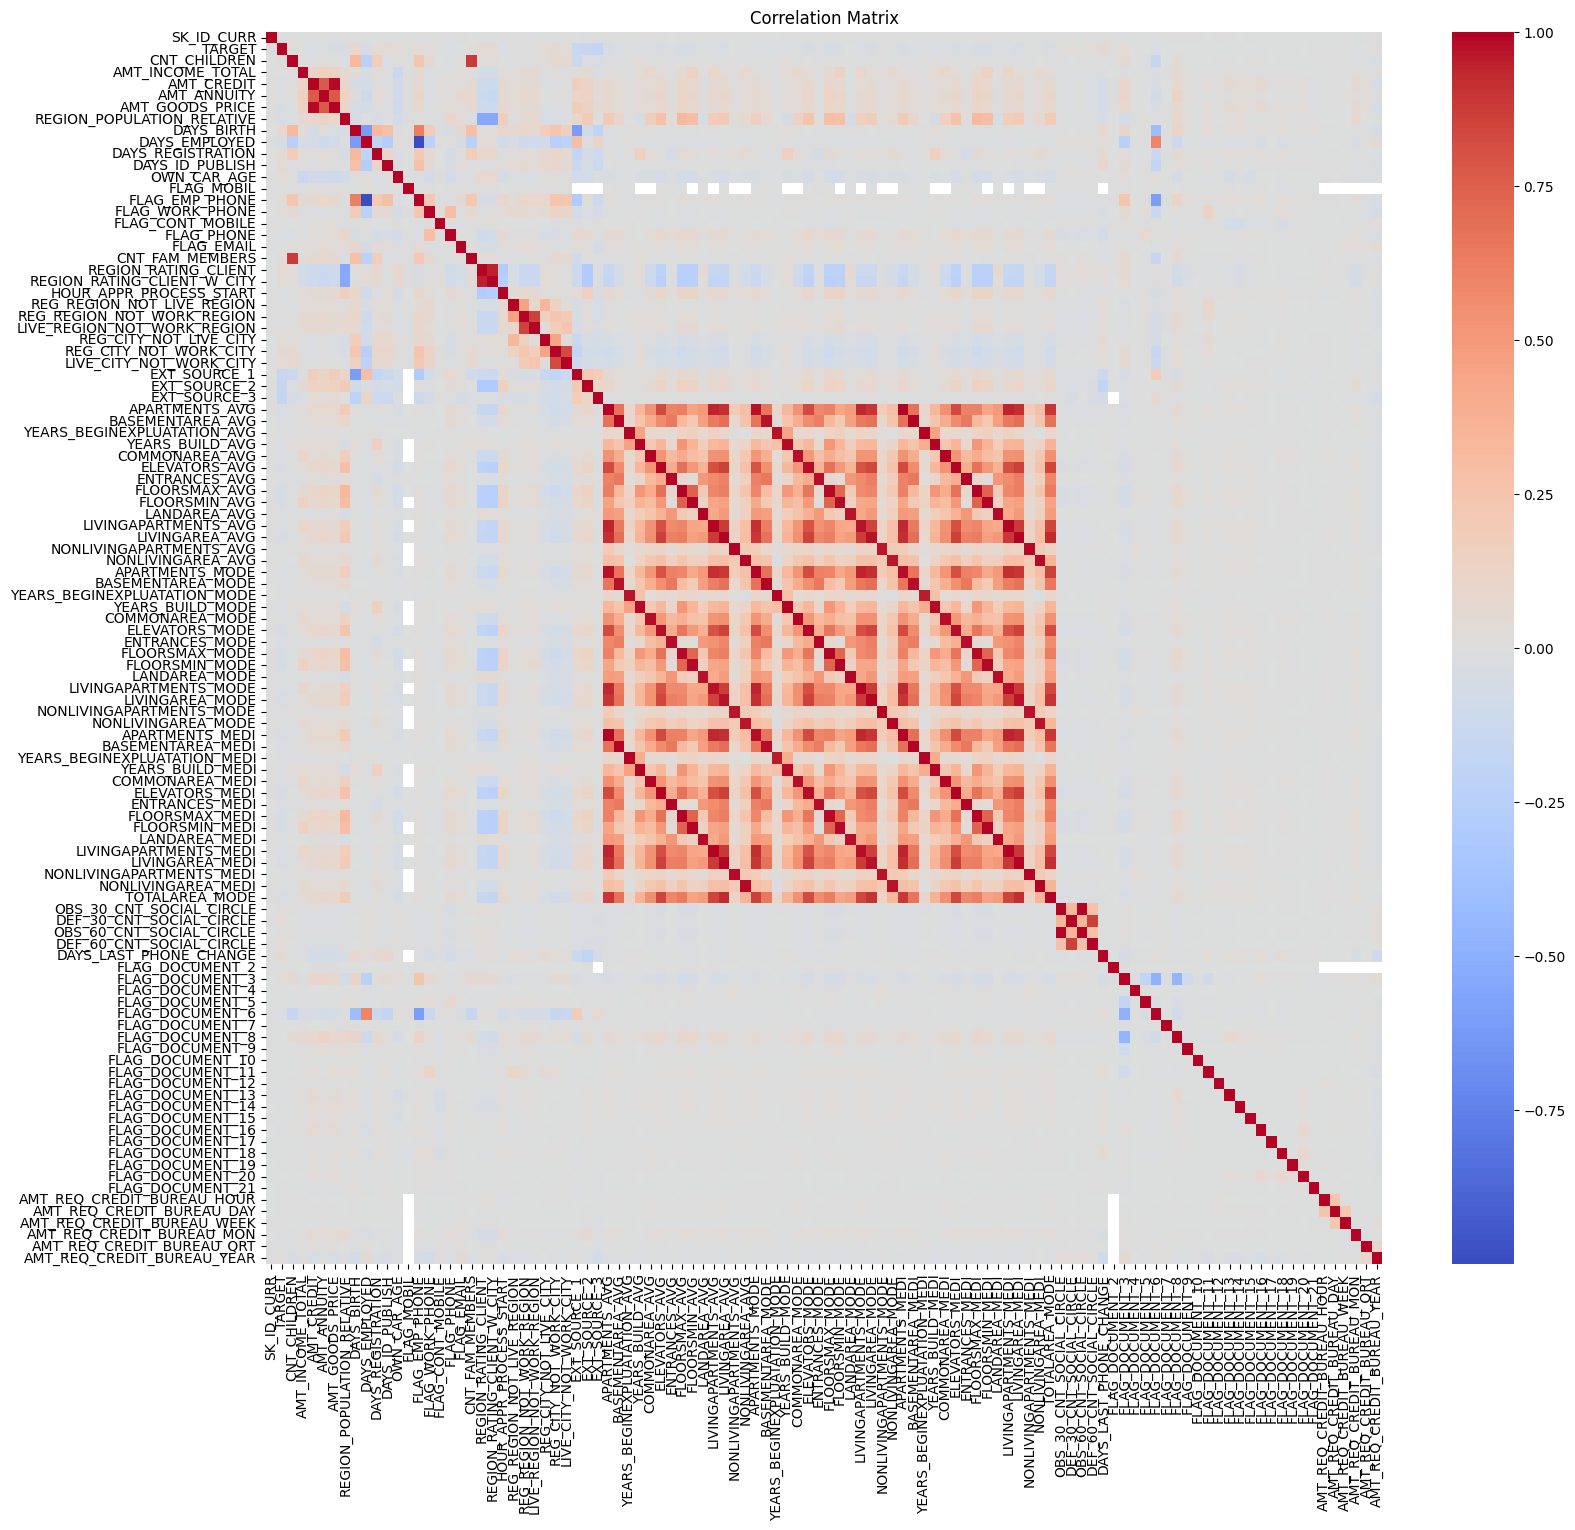

In [ ]:
# Ensure only numeric columns are used for the correlation matrix

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=False, xticklabels=True, yticklabels=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


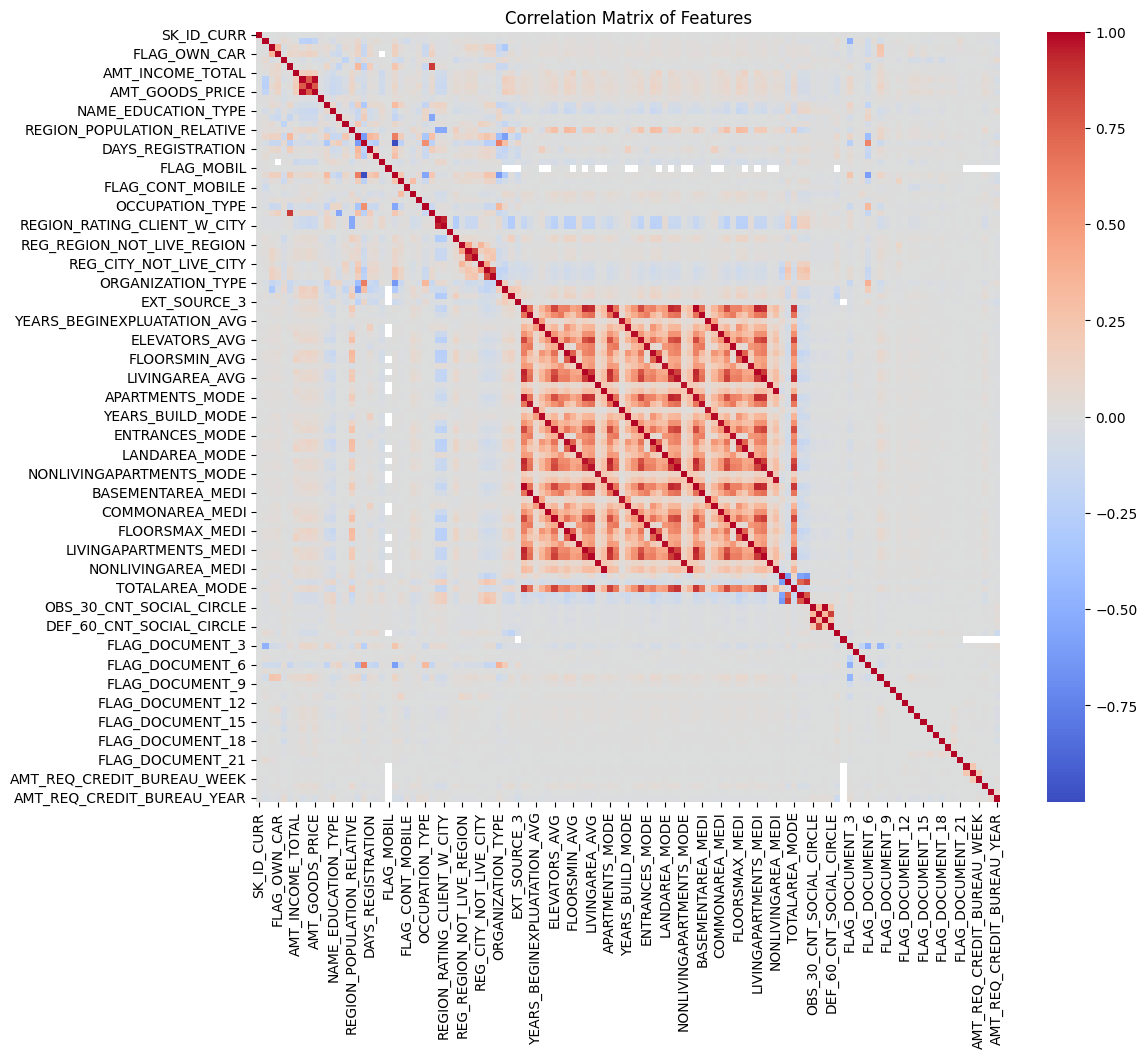

In [ ]:
# prompt: Make a correlation matrix for the features (handle features with values currently as text(categorical))

# Create a copy of the DataFrame to avoid modifying the original
df_corr = X.copy()

# Iterate through categorical features and apply Label Encoding
for feature in categorical_features:
  le = LabelEncoder()
  df_corr[feature] = le.fit_transform(df_corr[feature].astype(str))

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix (you can customize the display as needed)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

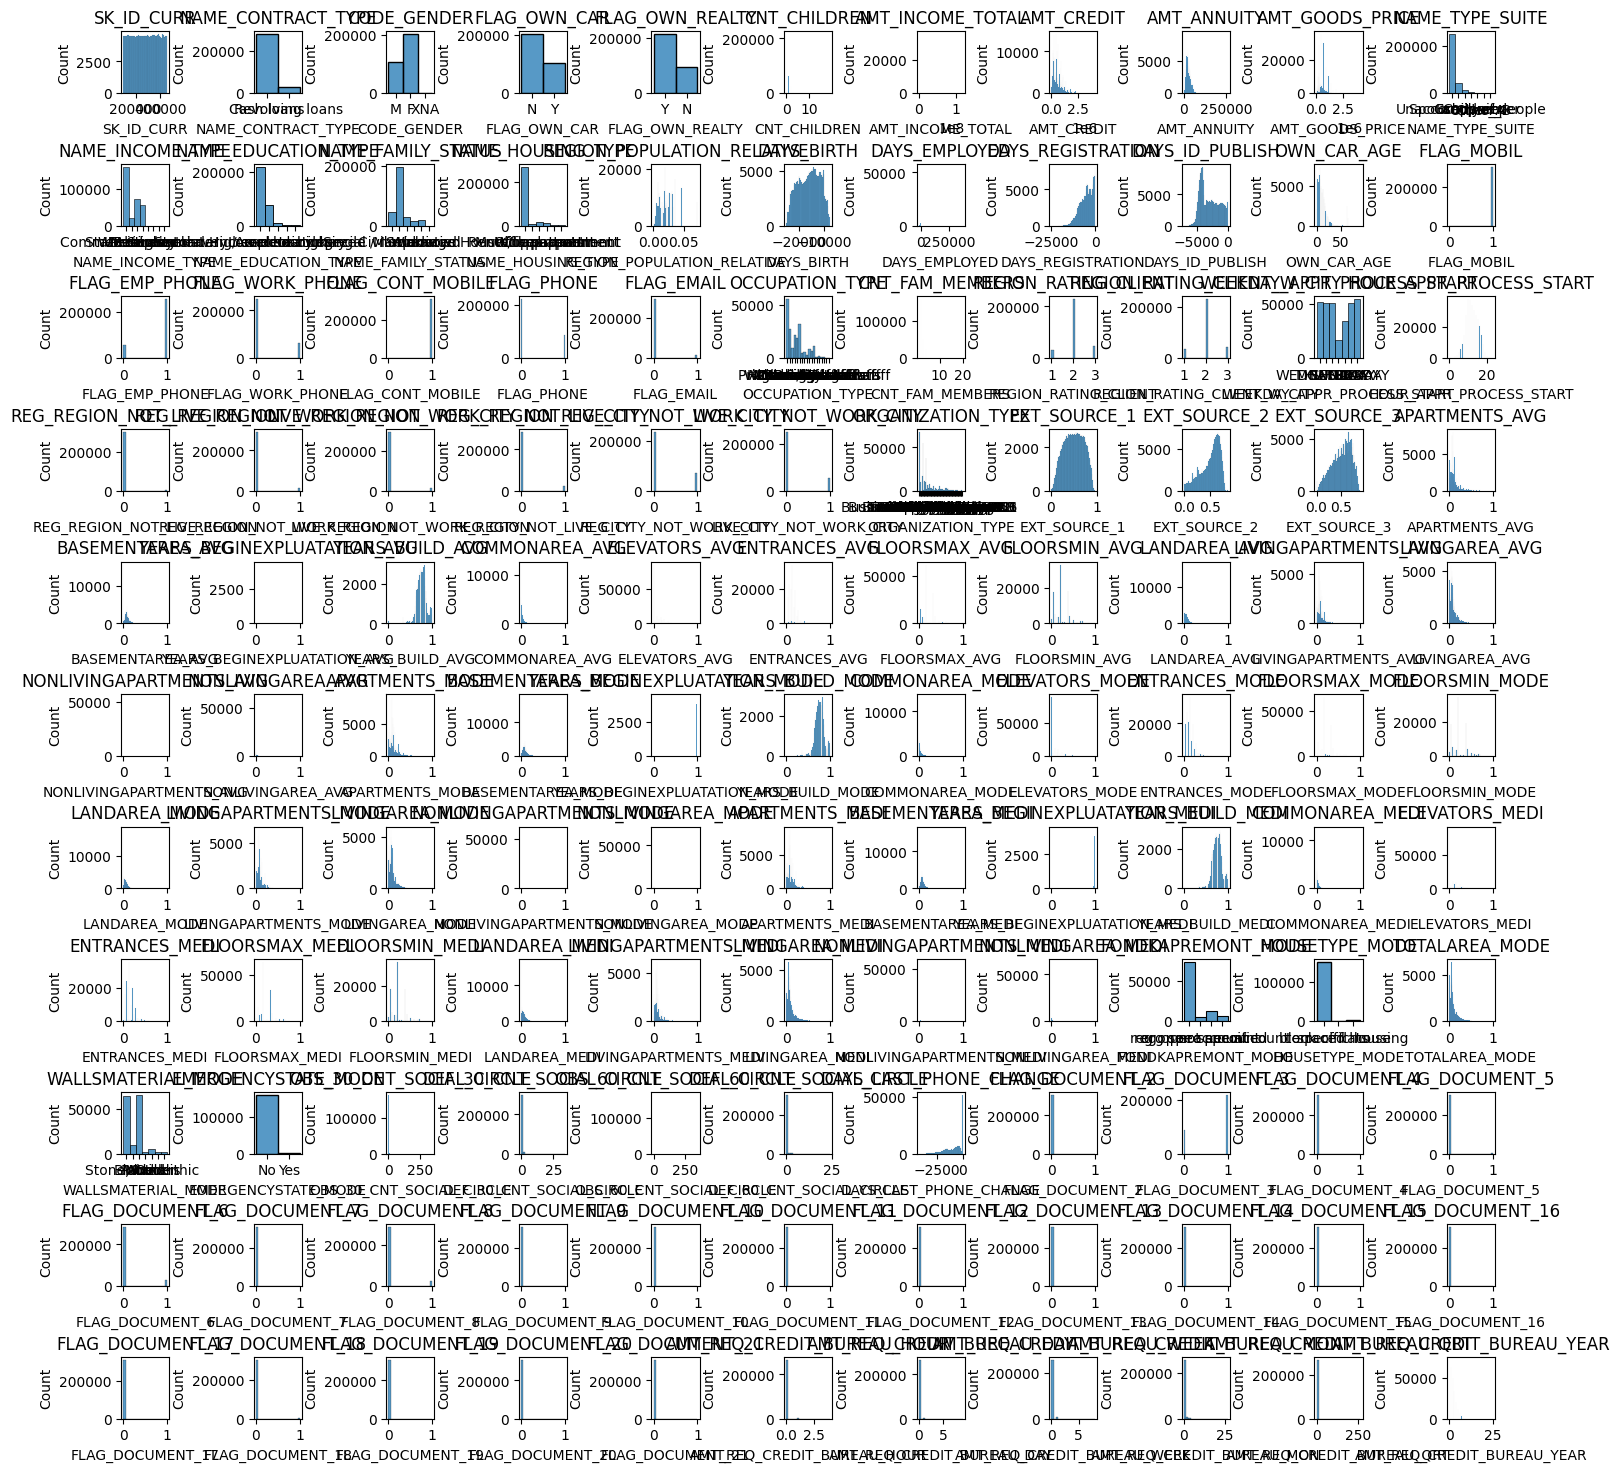

In [ ]:
# prompt: make a matrix of histograms for all the features (121)

# Assuming X is your DataFrame with features
num_features = X.shape[1]
num_rows = int(np.ceil(np.sqrt(num_features)))
num_cols = int(np.ceil(num_features / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for i, feature in enumerate(X.columns):
  row = i // num_cols
  col = i % num_cols

  try:
    sns.histplot(X[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)
  except IndexError:
    # Handle the case where there are more subplots created than needed
    pass


plt.show()

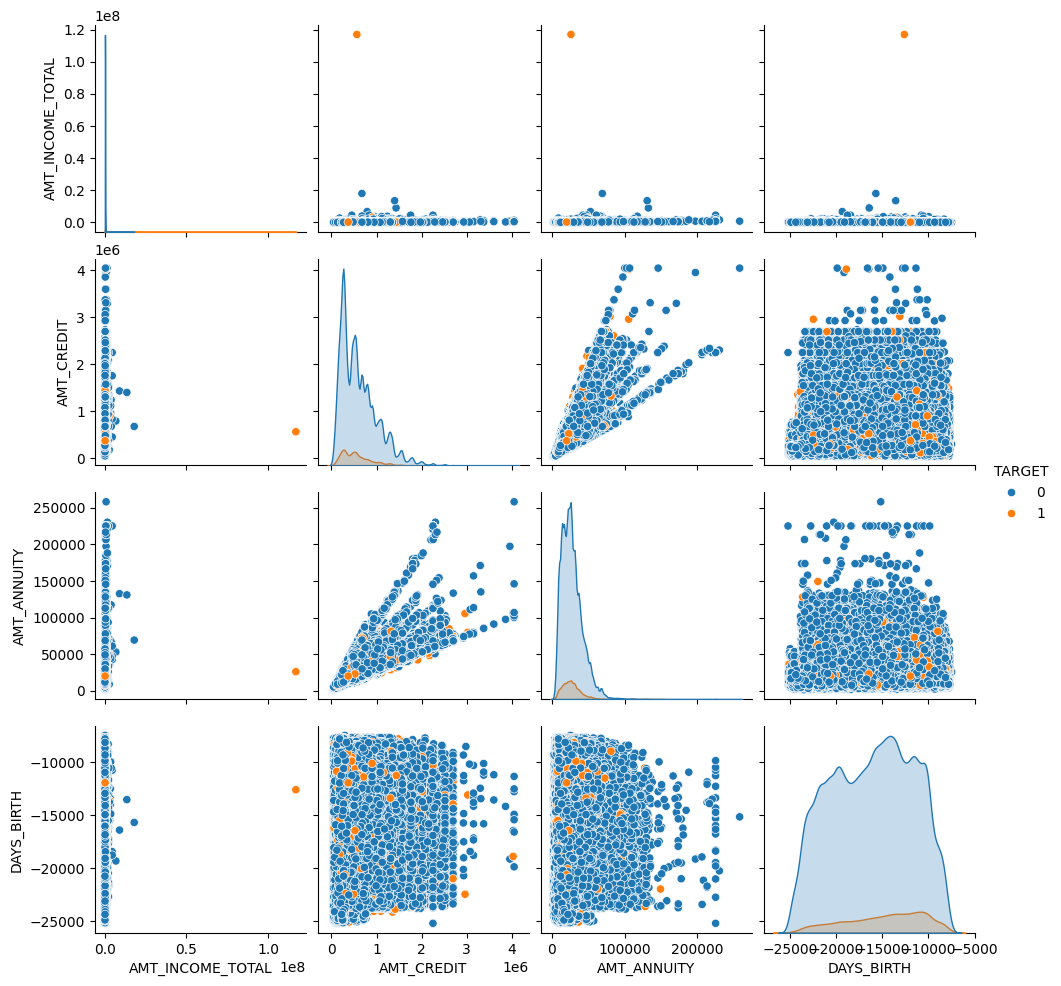

In [ ]:
# prompt: Select a few features and use them in a pairplot

# Select a few features for the pairplot
features_for_pairplot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'TARGET']

# Create the pairplot
sns.pairplot(df[features_for_pairplot], hue='TARGET')
plt.show()

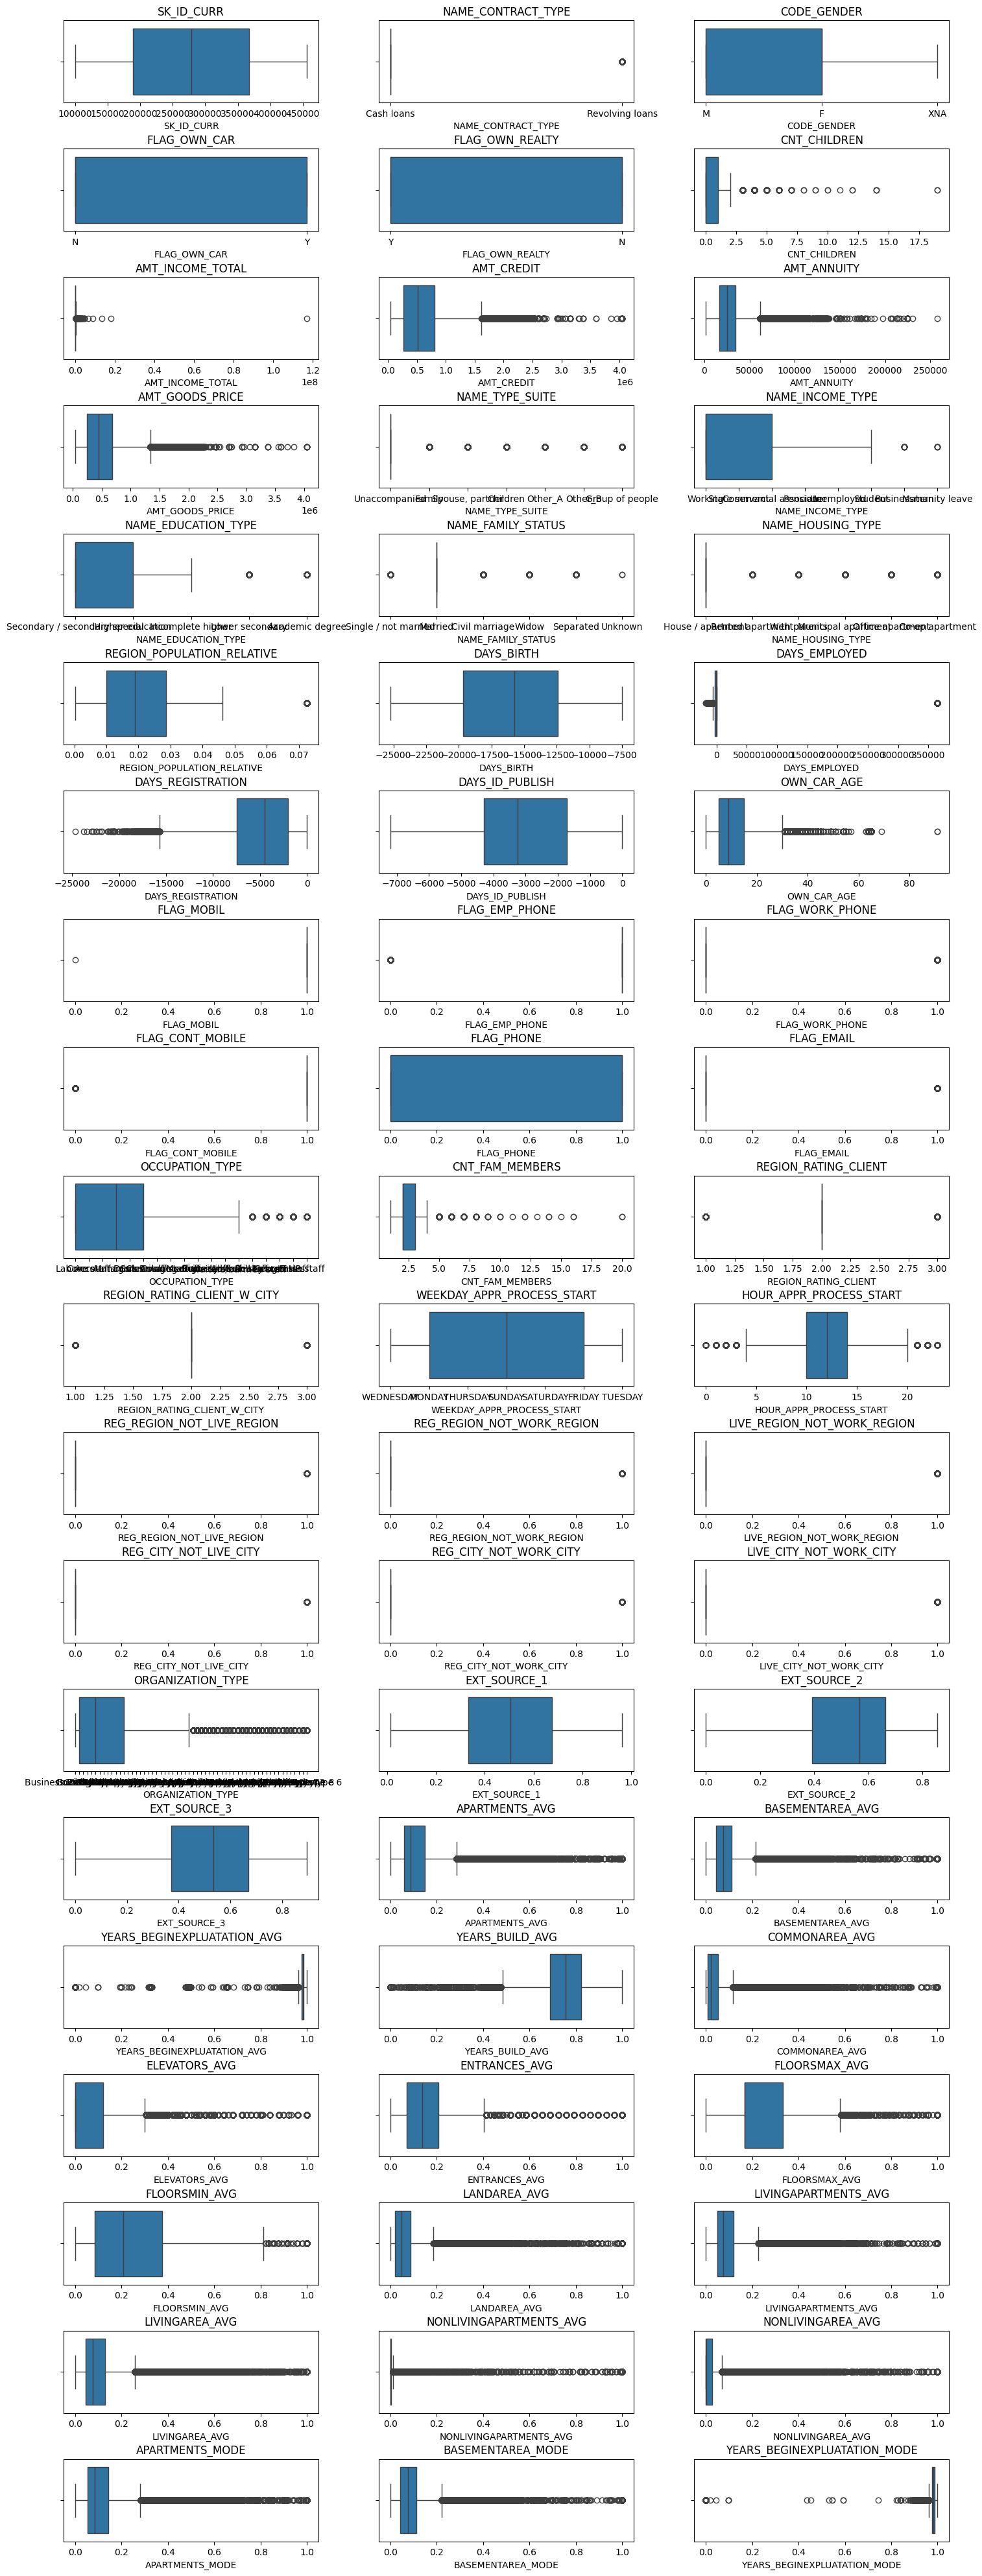

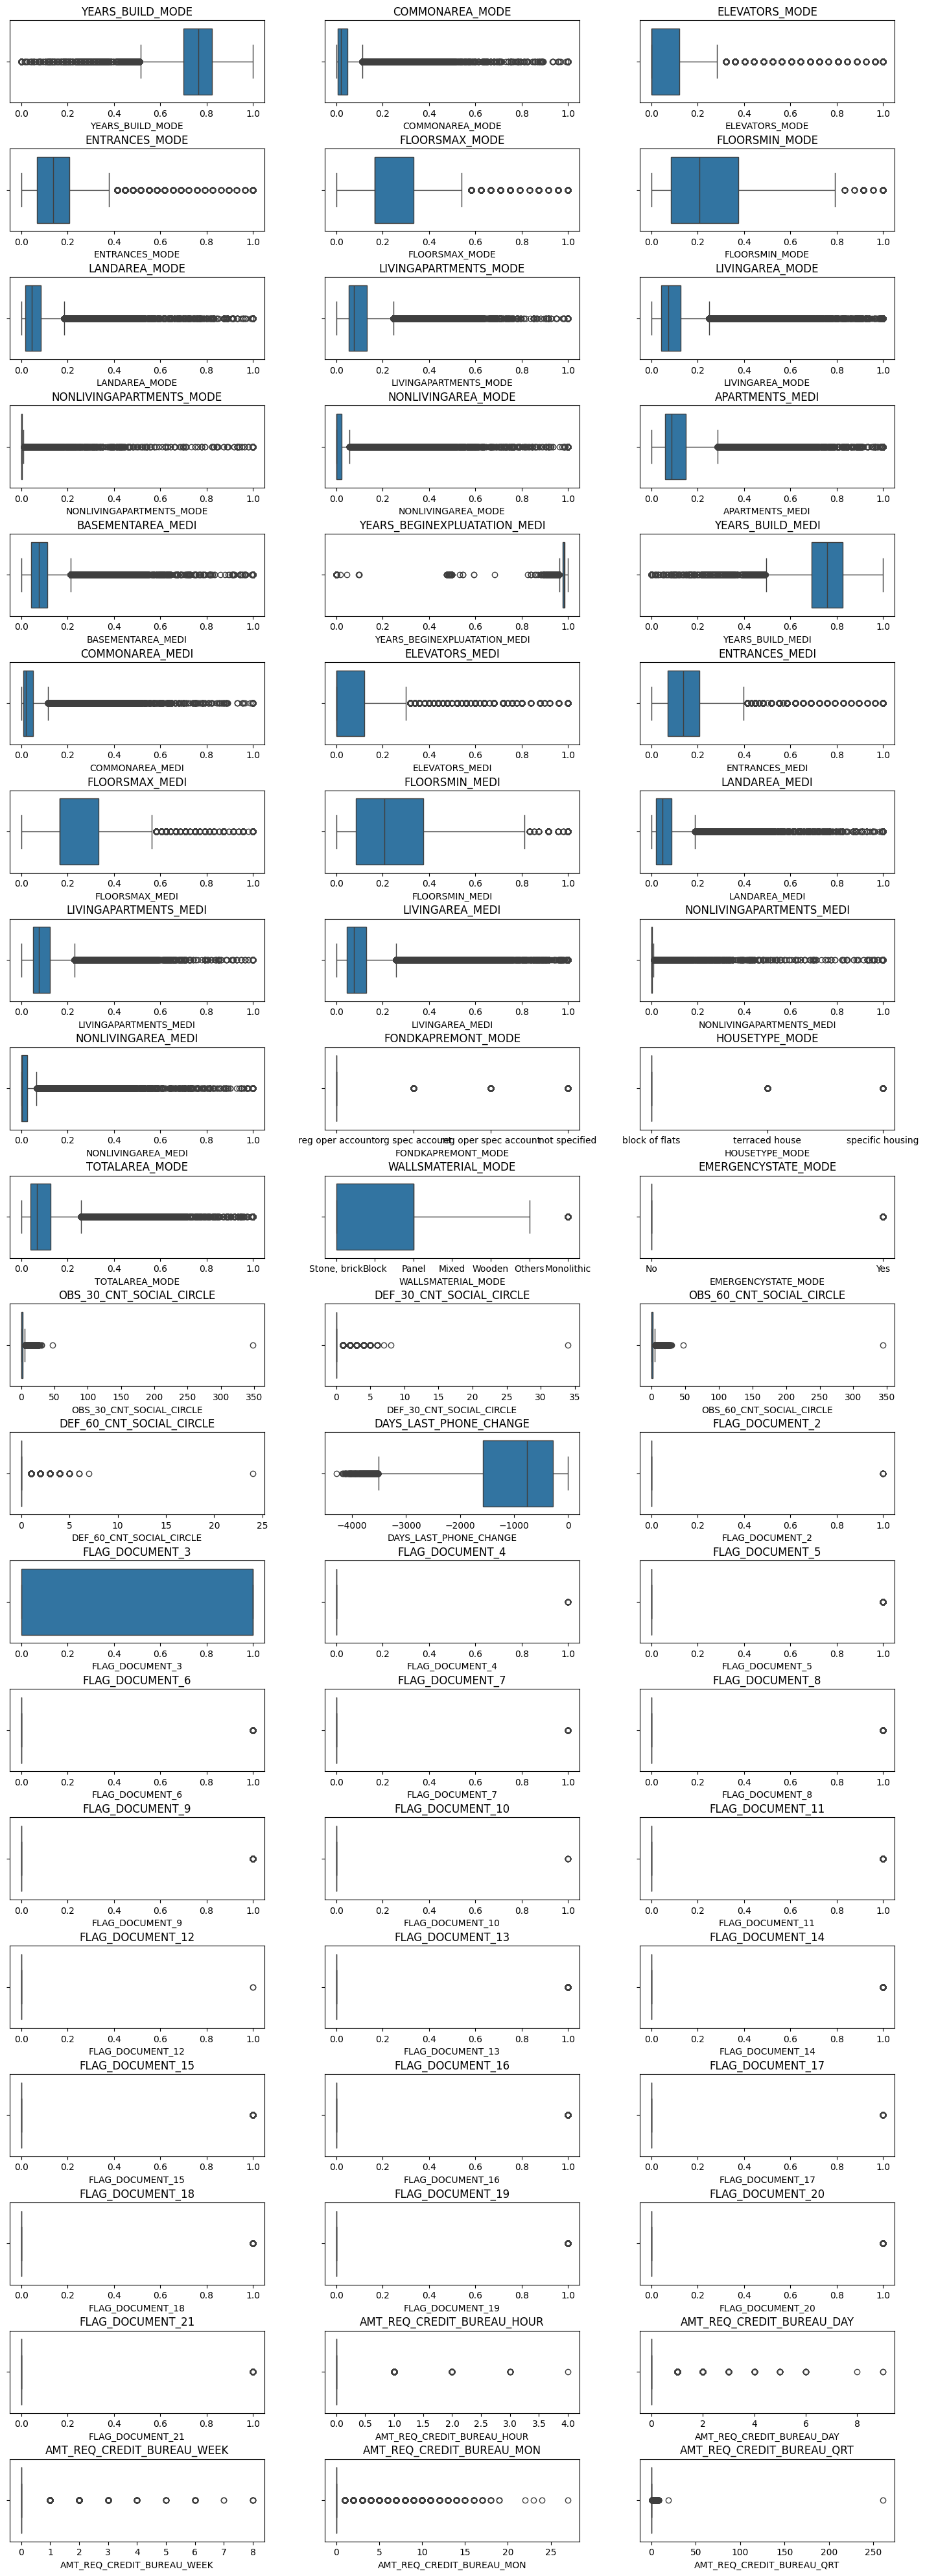

In [ ]:
# prompt: Make a boxplot for all the features. Since there's 121 features split it into 2 diagrams. Make sure that every boxplot is a subplot SO DO NOT CALL .BOXPLOT ON THE DATAFRAME DO IT FOR EVERY FEATURE. Show 3 boxplots on each row

# Assuming X is your DataFrame with features
num_features = X.shape[1]

# Split the features into two groups for the subplots
features_group1 = X.columns[:60]
features_group2 = X.columns[60:]

# Create the first figure and subplots for the first group of features
fig1, axes1 = plt.subplots(20, 3, figsize=(15, 40))
fig1.tight_layout(pad=3.0)

for i, feature in enumerate(features_group1):
    row = i // 3
    col = i % 3

    try:
        sns.boxplot(x=X[feature], ax=axes1[row, col])
        axes1[row, col].set_title(feature)
    except IndexError:
        # Handle the case where there are more subplots created than needed
        pass


# Create the second figure and subplots for the second group of features
fig2, axes2 = plt.subplots(20, 3, figsize=(15, 40))
fig2.tight_layout(pad=3.0)

for i, feature in enumerate(features_group2):
    row = i // 3
    col = i % 3

    try:
        sns.boxplot(x=X[feature], ax=axes2[row, col])
        axes2[row, col].set_title(feature)
    except IndexError:
        # Handle the case where there are more subplots created than needed
        pass


plt.show()

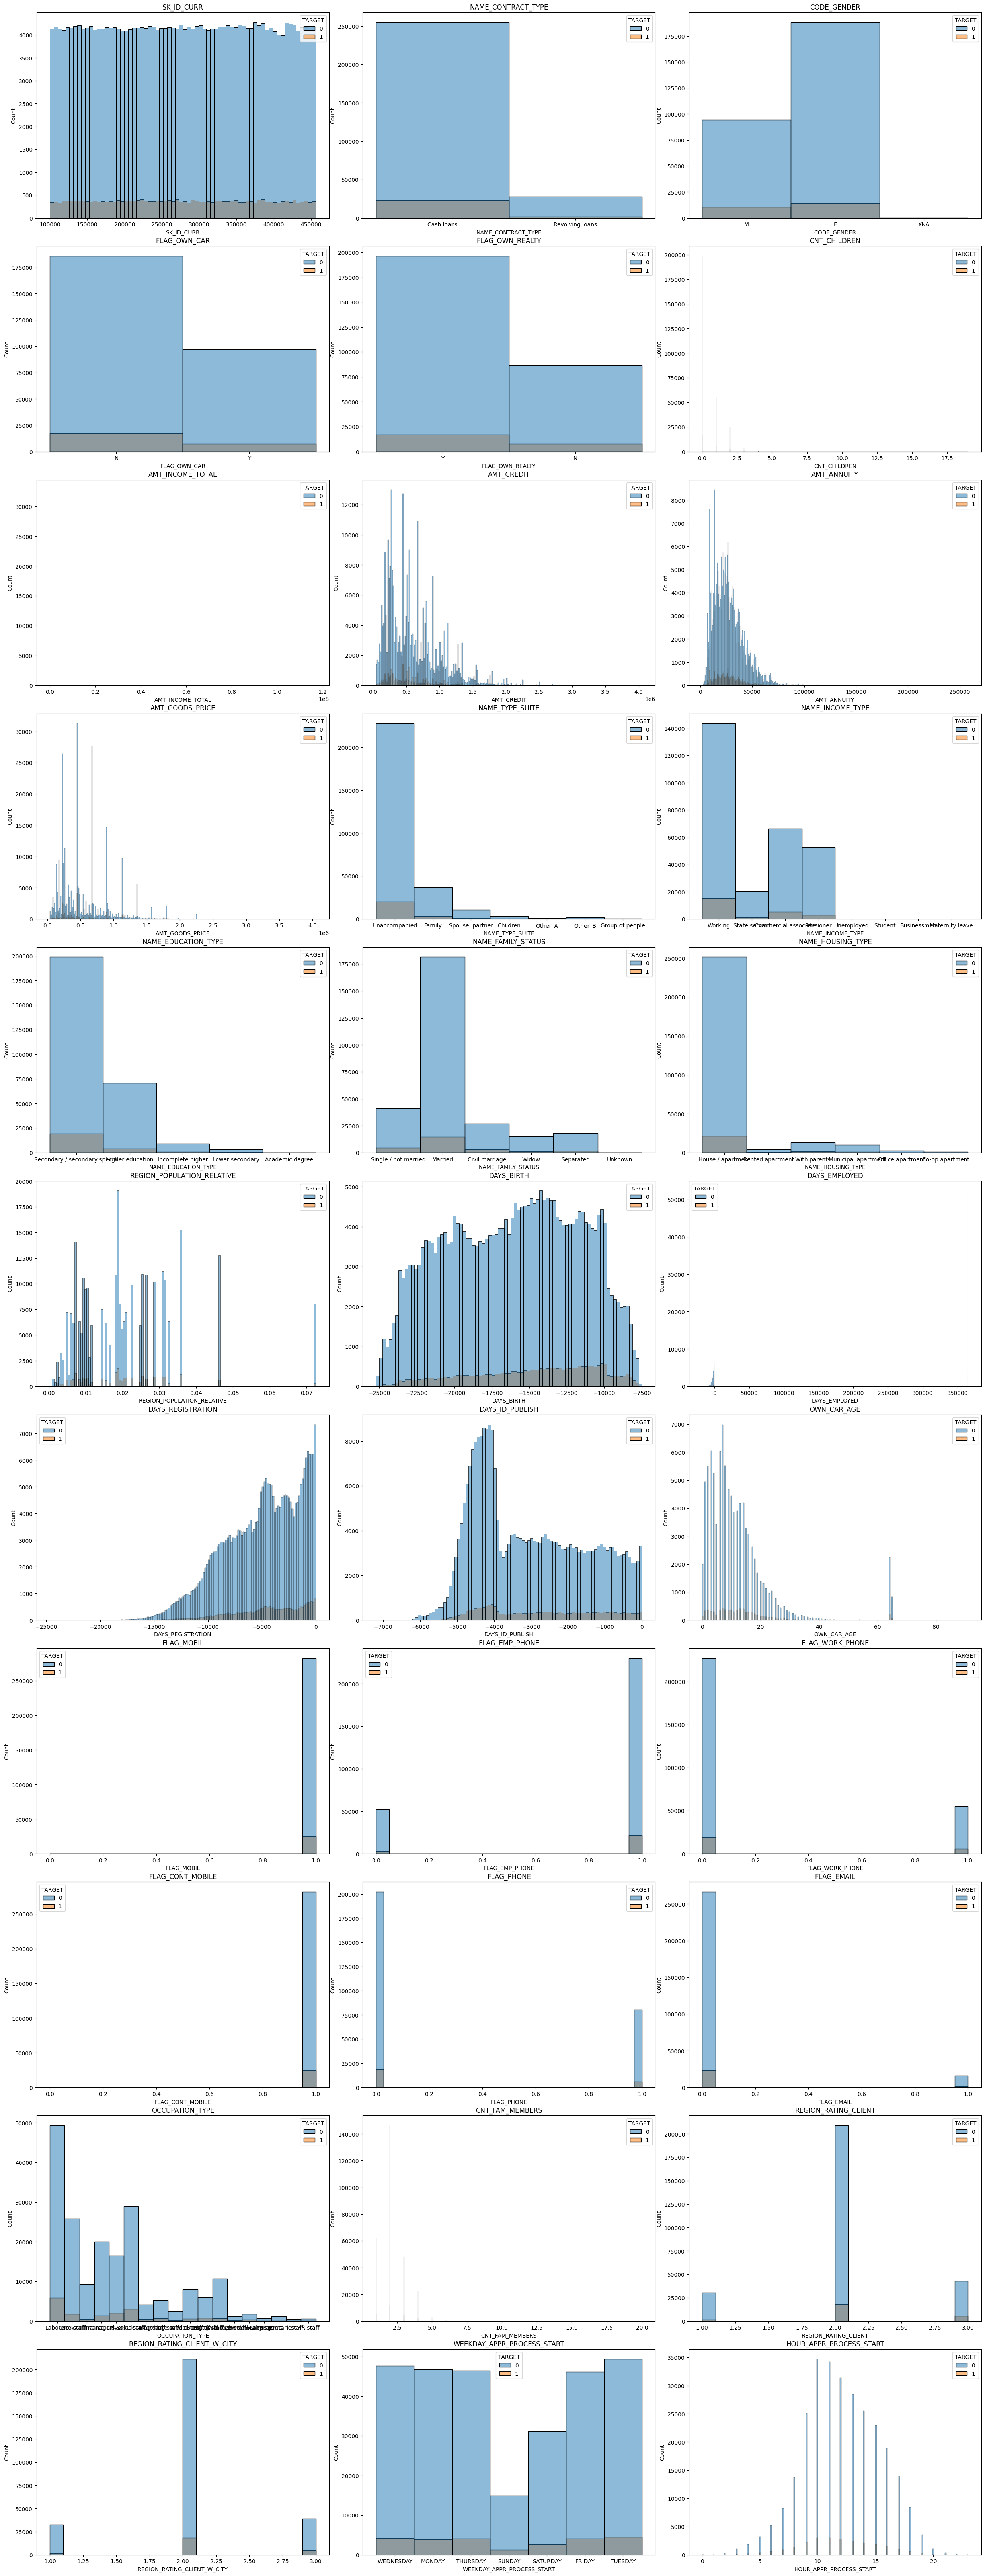

In [ ]:
# prompt: Do the same as above but now with histograms for each feature. Color by TARGET variable

# Assuming X is your DataFrame with features and y is your target variable
num_features = X.shape[1]
num_rows = int(np.ceil(np.sqrt(num_features)))
num_cols = int(3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 65))
fig.tight_layout(pad=3.0)

for i, feature in enumerate(X.columns):
  row = i // num_cols
  col = i % num_cols

  try:
    sns.histplot(x=X[feature], hue=y, ax=axes[row, col])  # Color by TARGET
    axes[row, col].set_title(feature)
  except IndexError:
    # Handle the case where there are more subplots created than needed
    pass

plt.show()

In [ ]:
print(df['TARGET'])

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


Number of entries removed: 306898
Percentage of entries removed: 99.80%


In [ ]:
# prompt: define categorical features

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical features
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# prompt:  Import train_test_split and split. Before that Handle all categorical and textual types such that it can be standardized using standardscaler. Only do scaling after split and do it then all columns (which is why you have to handle categorical columns beofre)

# Iterate through categorical features and apply Label Encoding
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: Show class distribution in both train and test

print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

Class Distribution in Training Set:


NameError: name 'y_train' is not defined

In [ ]:
# Create copies for PCA and RFE branches
X_PCA_train = X_train.copy()
X_PCA_test = X_test.copy()

X_RFE_train = X_train.copy()
X_RFE_test = X_test.copy()


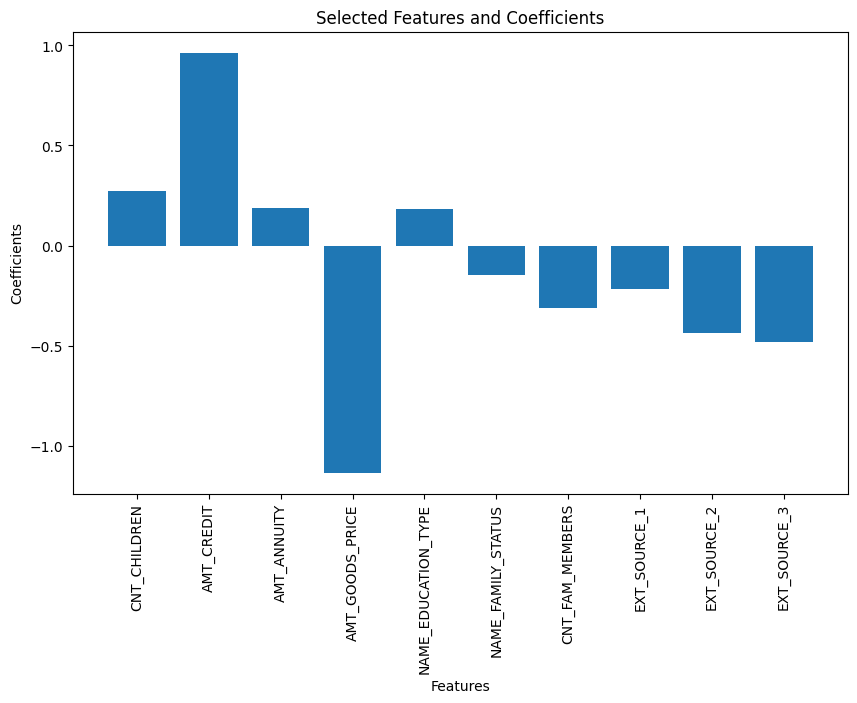

Selected features: ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [ ]:
# prompt: Perform RFE and visualize it. For RFE take care to avoid this error ValueError: Input X contains NaN.
# LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Impute missing values in X_RFE_train
# Impute missing values in X_RFE_train
imputer = SimpleImputer(strategy='mean')
X_RFE_imputed_train = imputer.fit_transform(X_RFE_train)

# Standardize features
scaler = StandardScaler()
X_RFE_scaled_train = scaler.fit_transform(X_RFE_imputed_train)

# Perform RFE with LogisticRegression
logreg = LogisticRegression(max_iter=1000)
selector = RFE(estimator=logreg, n_features_to_select=10, step=1)
selector = selector.fit(X_RFE_scaled_train, y_train)

# Visualize the selected features
selected_features = X_RFE_train.columns[selector.support_]
coefficients = selector.estimator_.coef_[0]  # Directly access the coefficients of the selected estimator

plt.figure(figsize=(10, 6))
plt.bar(selected_features, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Selected Features and Coefficients")
plt.xticks(rotation=90)
plt.show()

# Print the selected features
print("Selected features:", list(selected_features))

Evaluating with 1 features...
Evaluating with 5 features...
Evaluating with 10 features...
Evaluating with 15 features...
Evaluating with 25 features...
Evaluating with 30 features...
Evaluating with 40 features...
Evaluating with 50 features...
Evaluating with 60 features...
Evaluating with 70 features...
Evaluating with 90 features...
Evaluating with 115 features...
Optimal number of features: 10


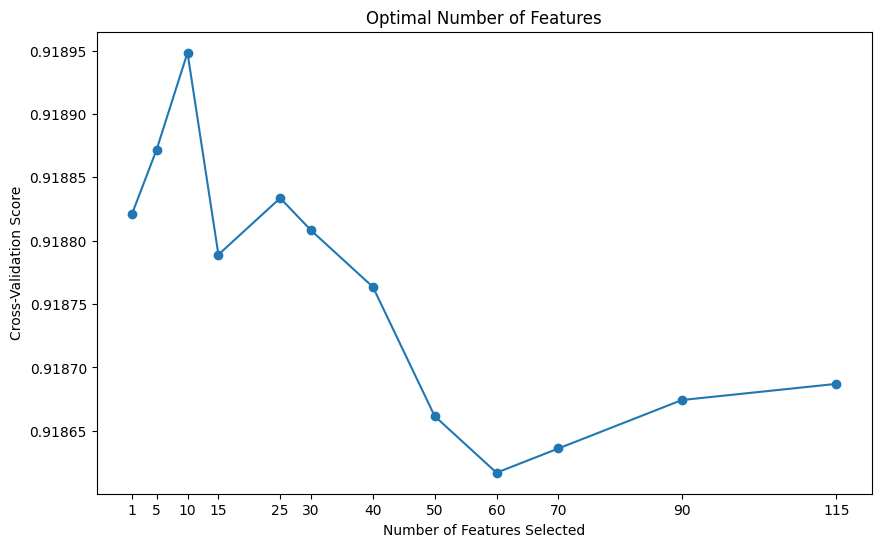

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define a subset of feature counts to test
feature_counts = [1, 5, 10, 15, 25, 30, 40, 50, 60, 70, 90, 115]

# Placeholder for storing cross-validation scores
cv_scores = []

# Impute and scale the data
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
X_RFE_imputed_train = imputer.fit_transform(X_RFE_train)
X_RFE_scaled_train = scaler.fit_transform(X_RFE_imputed_train)

# Evaluate performance for selected numbers of features
for n_features in feature_counts:
    logreg = LogisticRegression(max_iter=400)
    print(f"Evaluating with {n_features} features...")
    selector = RFE(estimator=logreg, n_features_to_select=n_features, step=1)
    selector = selector.fit(X_RFE_scaled_train, y_train)
    # Cross-validate the performance of the model with the selected features
    score = cross_val_score(selector.estimator_, selector.transform(X_RFE_scaled_train), y_train, cv=5).mean()
    cv_scores.append(score)

# Find the optimal number of features
optimal_n_features = feature_counts[np.argmax(cv_scores)]
print(f"Optimal number of features: {optimal_n_features}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, cv_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.title("Optimal Number of Features")
plt.xticks(feature_counts)
plt.show()


In [ ]:
# Refit RFE with the optimal number of features
logreg = LogisticRegression(max_iter=1000)
selector = RFE(estimator=logreg, n_features_to_select=optimal_n_features, step=1)
selector = selector.fit(X_RFE_scaled_train, y_train)

# Transform the training and test sets
X_RFE_scaled_test = scaler.transform(imputer.transform(X_RFE_test))  # Impute and scale the test set
X_RFE_optimal_train = selector.transform(X_RFE_scaled_train)
X_RFE_optimal_test = selector.transform(X_RFE_scaled_test)

# Optional: Print the selected features for reference
selected_features = X_RFE_train.columns[selector.support_]
print(f"Optimal features ({optimal_n_features}): {list(selected_features)}")

# Check the shapes of the transformed datasets
print(f"Shape of X_RFE_optimal_train: {X_RFE_optimal_train.shape}")
print(f"Shape of X_RFE_optimal_test: {X_RFE_optimal_test.shape}")


Optimal features (10): ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
Shape of X_RFE_optimal_train: (156863, 10)
Shape of X_RFE_optimal_test: (39216, 10)


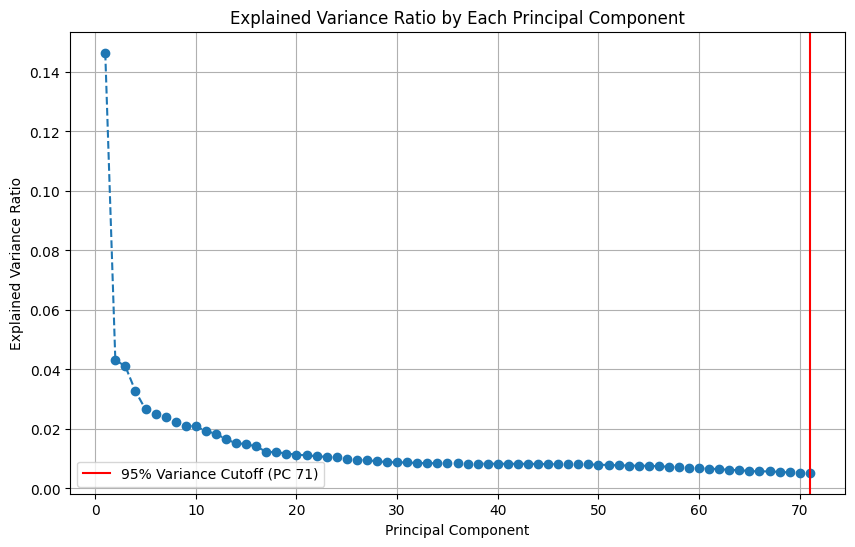

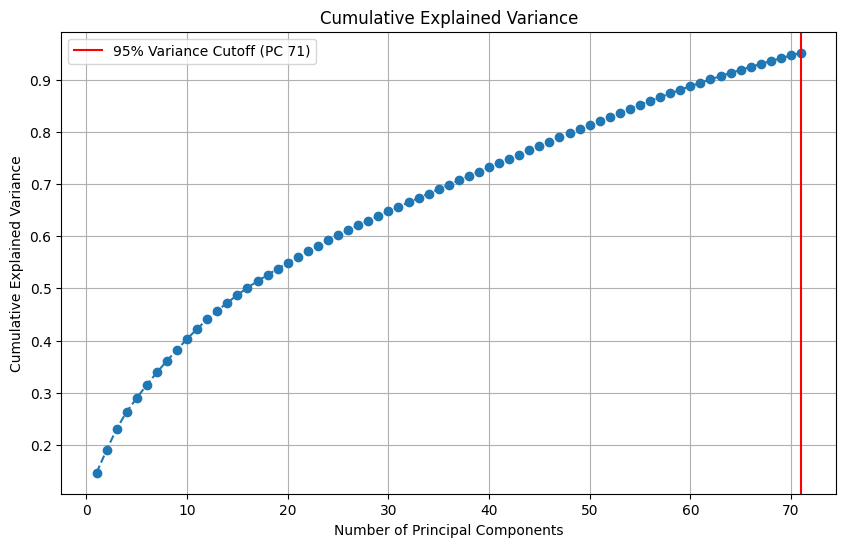

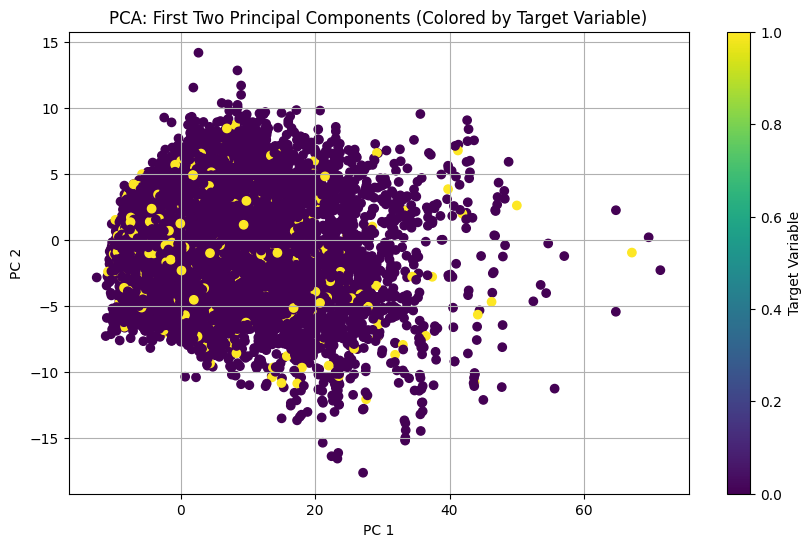

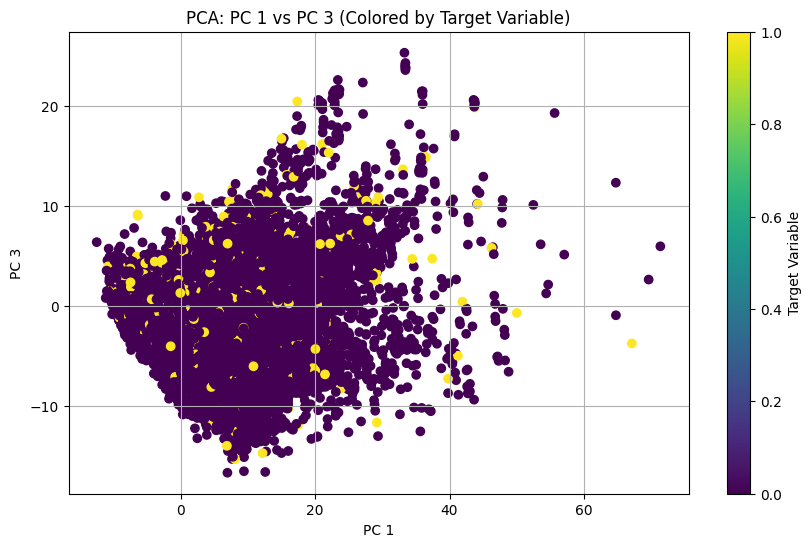

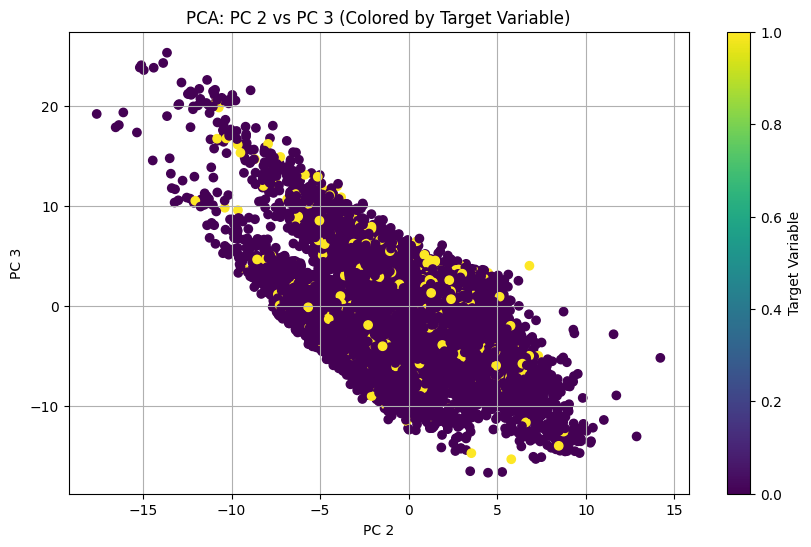

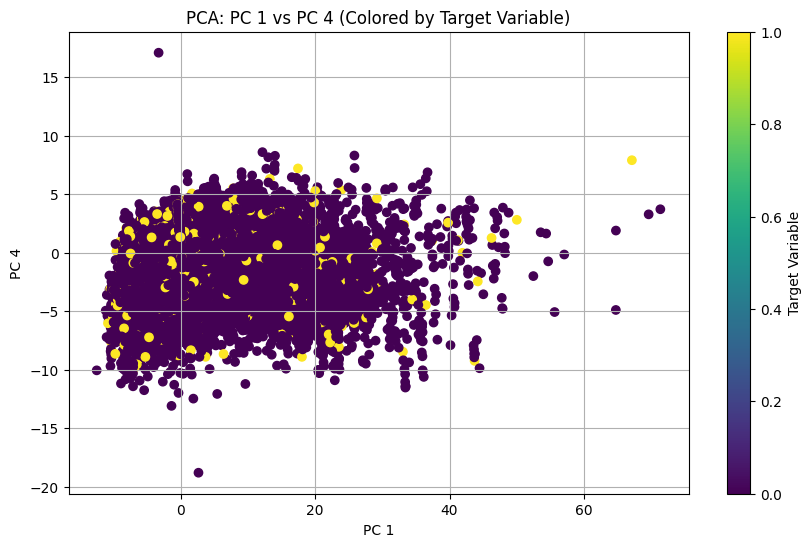

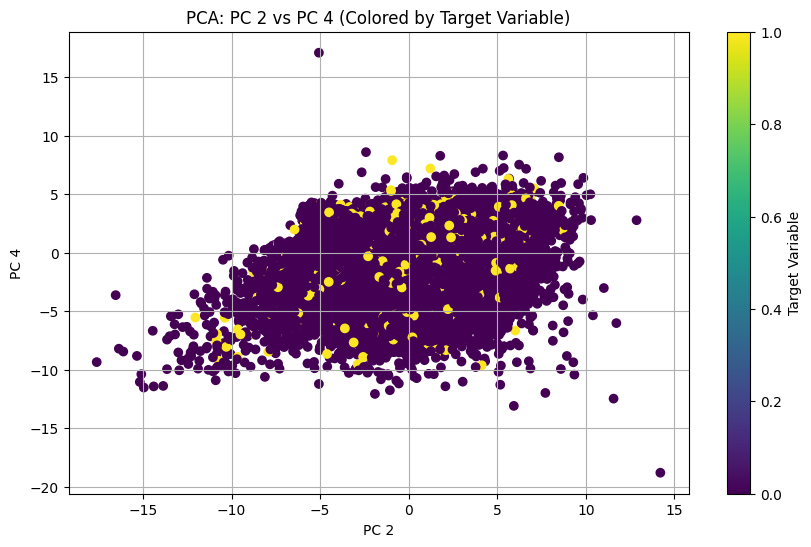

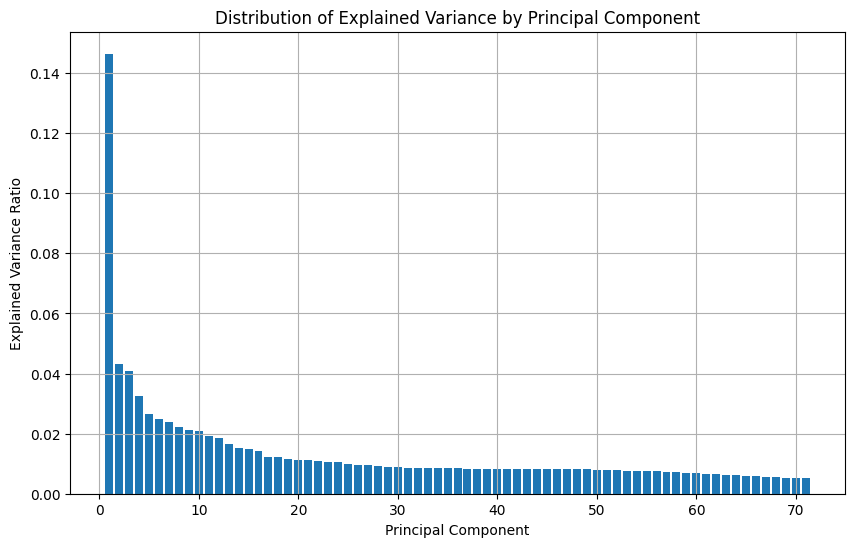

Number of components to keep 95% variance: 71
Shape of X_RFE_pca_train: (156863, 71)
Shape of X_RFE_pca_test: (39216, 71)


NameError: name 'p' is not defined

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit PCA on the training data (keeping 95% variance)
pca = PCA(n_components=0.95)  # This will keep enough components to explain 95% of the variance
X_RFE_imputed_train = imputer.fit_transform(X_RFE_train)  # Impute missing values if necessary
X_RFE_scaled_train = scaler.fit_transform(X_RFE_imputed_train)  # Scale the data
X_RFE_scaled_test = scaler.transform(imputer.transform(X_RFE_test))  # Scale and impute the test data

# Fit PCA and transform the training data
X_RFE_pca_train = pca.fit_transform(X_RFE_scaled_train)

# Step 2: Transform the test data using the fitted PCA
X_RFE_pca_test = pca.transform(X_RFE_scaled_test)

# Step 3: Visualize the explained variance ratio to show how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.axvline(x=pca.n_components_, color='red', linestyle='-', label=f'95% Variance Cutoff (PC {pca.n_components_})')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Each Principal Component')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Visualize the cumulative explained variance with a red line at 95% cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axvline(x=pca.n_components_, color='red', linestyle='-', label=f'95% Variance Cutoff (PC {pca.n_components_})')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Scatter plot of the first two principal components, colored by the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_RFE_pca_train[:, 0], X_RFE_pca_train[:, 1], c=y_train, cmap='viridis', marker='o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA: First Two Principal Components (Colored by Target Variable)')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

# Step 6: Scatter plot of PC 1 and PC 3, colored by the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_RFE_pca_train[:, 0], X_RFE_pca_train[:, 2], c=y_train, cmap='viridis', marker='o')
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.title('PCA: PC 1 vs PC 3 (Colored by Target Variable)')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

# Step 7: Scatter plot of PC 2 and PC 3, colored by the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_RFE_pca_train[:, 1], X_RFE_pca_train[:, 2], c=y_train, cmap='viridis', marker='o')
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('PCA: PC 2 vs PC 3 (Colored by Target Variable)')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

# Step 8: Scatter plot of PC 1 and PC 4, colored by the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_RFE_pca_train[:, 0], X_RFE_pca_train[:, 3], c=y_train, cmap='viridis', marker='o')
plt.xlabel('PC 1')
plt.ylabel('PC 4')
plt.title('PCA: PC 1 vs PC 4 (Colored by Target Variable)')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

# Step 9: Scatter plot of PC 2 and PC 4, colored by the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_RFE_pca_train[:, 1], X_RFE_pca_train[:, 3], c=y_train, cmap='viridis', marker='o')
plt.xlabel('PC 2')
plt.ylabel('PC 4')
plt.title('PCA: PC 2 vs PC 4 (Colored by Target Variable)')
plt.colorbar(label='Target Variable')
plt.grid(True)
plt.show()

# Step 10: Show the importance (explained variance) distribution of the principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Distribution of Explained Variance by Principal Component')
plt.grid(True)
plt.show()

# Step 11: Print out the number of components used and the shape of the transformed datasets
print(f"Number of components to keep 95% variance: {pca.n_components_}")
print(f"Shape of X_RFE_pca_train: {X_RFE_pca_train.shape}")
print(f"Shape of X_RFE_pca_test: {X_RFE_pca_test.shape}")
p

In [ ]:
# prompt: Train and evaluate one logistic regression model where it uses the X,y but only applies one hot encoding & simple mean imputer and standardscaler as a benchmark

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are defined as in your provided code

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter
])


# Split data (already done in your code, but showing it for completeness)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the Logistic Regression model: 0.9181456548347613
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     36010
           1       0.47      0.01      0.02      3206

    accuracy                           0.92     39216
   macro avg       0.70      0.50      0.49     39216
weighted avg       0.88      0.92      0.88     39216



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline from imblearn

# Assuming X and y are defined as in your provided code

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the oversampling technique and model pipeline
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model after SMOTE: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy of the Logistic Regression model after SMOTE: 0.6909934720522236
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     36028
           1       0.16      0.66      0.26      3188

    accuracy                           0.69     39216
   macro avg       0.56      0.68      0.53     39216
weighted avg       0.89      0.69      0.76     39216



In [ ]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # For imbalanced-learn pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Placeholder: Replace X and y with your dataset
# X: features, y: target variable
# numerical_cols and categorical_cols are extracted from X as shown earlier
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define base classifier
base_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Define the RFE pipeline
rfe_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_selection', RFE(estimator=base_classifier, n_features_to_select=10)),
    ('classifier', base_classifier)
])

# Define the PCA pipeline
pca_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('dim_reduction', PCA(n_components=71, random_state=42)),
    ('classifier', base_classifier)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to train, evaluate, and plot ROC curves
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test, pipeline_name):
    print(f"Training {pipeline_name} pipeline...")
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    y_pred = pipeline.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"{pipeline_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{pipeline_name} - Cross-Validation Mean ROC AUC: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{pipeline_name} (AUC = {roc_auc:.2f})')

# Evaluate both pipelines
#plt.figure(figsize=(10, 8))
#evaluate_pipeline(rfe_pipeline, X_train, y_train, X_test, y_test, "RFE")
#evaluate_pipeline(pca_pipeline, X_train, y_train, X_test, y_test, "PCA")

# Plot ROC diagonal
#plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal for random classifier
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#lt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve for Pipelines')
#plt.legend(loc='lower right')
#plt.show()


Training RFE pipeline...


KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV  # Import BayesianSearchCV


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming the data is already loaded
# X_RFE_train, X_RFE_test, X_RFE_pca_train, X_RFE_pca_test, y_train, y_test, and y_target are already defined

# Function to perform randomized hyperparameter search and model evaluation
def train_and_evaluate(models, X_train, y_train, X_test, y_test, param_distributions=None, cv_folds=5):
    results = {}
    for name, model in models.items():
        try:
            # Perform hyperparameter search if parameters are provided
            bayes_search = None
            if param_distributions and name in param_distributions:
                bayes_search = BayesSearchCV(model, param_distributions[name], n_iter=50, cv=cv_folds, random_state=42)
                bayes_search.fit(X_train, y_train)
                best_model = bayes_search.best_estimator_
                print(f"Best hyperparameters for {name}: {bayes_search.best_params_}")
            else:
                best_model = model
                best_model.fit(X_train, y_train)

            # Make predictions
            y_pred = best_model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Get cross-validation scores
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_folds, scoring='accuracy')

            # Save results
            results[name] = {
                'Accuracy': accuracy,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Accuracy': np.std(cv_scores),
                'Classification Report': classification_report(y_test, y_pred),
                'Best Hyperparameters': bayes_search.best_params_ if bayes_search else None,
                'Model': best_model
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

    return results


# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

# Define parameter distributions for hyperparameter tuning
param_distributions = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [25, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2]
      },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [25, 50, 100],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
}

#
#
#
#
#Best hyperparameters for Logistic Regression: {'solver': 'lbfgs', 'C': 100}
#Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
#Best hyperparameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 15, 'leaf_size': 30, 'algorithm': 'ball_tree'}
#Best hyperparameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


# Train and evaluate models on RFE feature set
results_rfe = train_and_evaluate(models, X_RFE_optimal_train, y_train, X_RFE_optimal_test, y_test, param_distributions)

# Print results for RFE
print("Results for RFE Feature Set:")
for model_name, metrics in results_rfe.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"CV Mean Accuracy: {metrics['CV Mean Accuracy']:.4f} (+/- {metrics['CV Std Accuracy']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")

# Train and evaluate models on PCA feature set
results_pca = train_and_evaluate(models, X_RFE_pca_train, y_train, X_RFE_pca_test, y_test, param_distributions)

# Print results for PCA
print("Results for PCA Feature Set:")
for model_name, metrics in results_pca.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"CV Mean Accuracy: {metrics['CV Mean Accuracy']:.4f} (+/- {metrics['CV Std Accuracy']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")

# Visualize results: Compare accuracies between RFE and PCA models
rfe_accuracies = [metrics['Accuracy'] for metrics in results_rfe.values()]
pca_accuracies = [metrics['Accuracy'] for metrics in results_pca.values()]

# Plot the comparison of accuracies
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
ind = np.arange(len(models))  # the x locations for the groups

rects1 = ax.bar(ind - width/2, rfe_accuracies, width, label='RFE')
rects2 = ax.bar(ind + width/2, pca_accuracies, width, label='PCA')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison: RFE vs PCA')
ax.set_xticks(ind)
ax.set_xticklabels(models.keys())
ax.legend()

plt.tight_layout()
plt.show()

# Visualize the classification report comparison (optionally)


NameError: name 'X_RFE_optimal_train' is not defined

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


param_distributions_rfe = {
    'Logistic Regression': {
        'C': 100,
        'solver': 'lbfgs'
    },
    'Random Forest': {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 10,
        'min_samples_leaf': 1
    },
    'K-Nearest Neighbors': {
        'n_neighbors': 15,
        'weights': 'uniform',
        'algorithm': 'ball_tree',
        'leaf_size': 30
    },
    'XGBoost': {
        'subsample': 1.0,
        'n_estimators': 50,
        'max_depth': 3,
        'learning_rate': 0.01,
        'gamma': 0.1,
        'colsample_bytree': 0.8
    }
}

param_distributions_pca = {
    'Logistic Regression': {
        'C': 0.001,
        'solver': 'lbfgs'
    },
    'Random Forest': {
        'n_estimators': 50,
        'max_depth': 20,
        'min_samples_split': 5,
        'min_samples_leaf': 2
    },
    'K-Nearest Neighbors': {
        'n_neighbors': 10,
        'weights': 'uniform',
        'algorithm': 'ball_tree',
        'leaf_size': 40
    },
    'XGBoost': {
        'subsample': 1.0,
        'n_estimators': 100,
        'max_depth': 3,
        'learning_rate': 0.1,
        'gamma': 0.2,
        'colsample_bytree': 0.8
    }
}
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}


Training Logistic Regression...
Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.9183, ROC AUC: 0.7326
Training Random Forest...
Evaluating Random Forest...
Random Forest - Accuracy: 0.9183, ROC AUC: 0.7357
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9177, ROC AUC: 0.6670
Training XGBoost...
Evaluating XGBoost...
XGBoost - Accuracy: 0.9182, ROC AUC: 0.7114


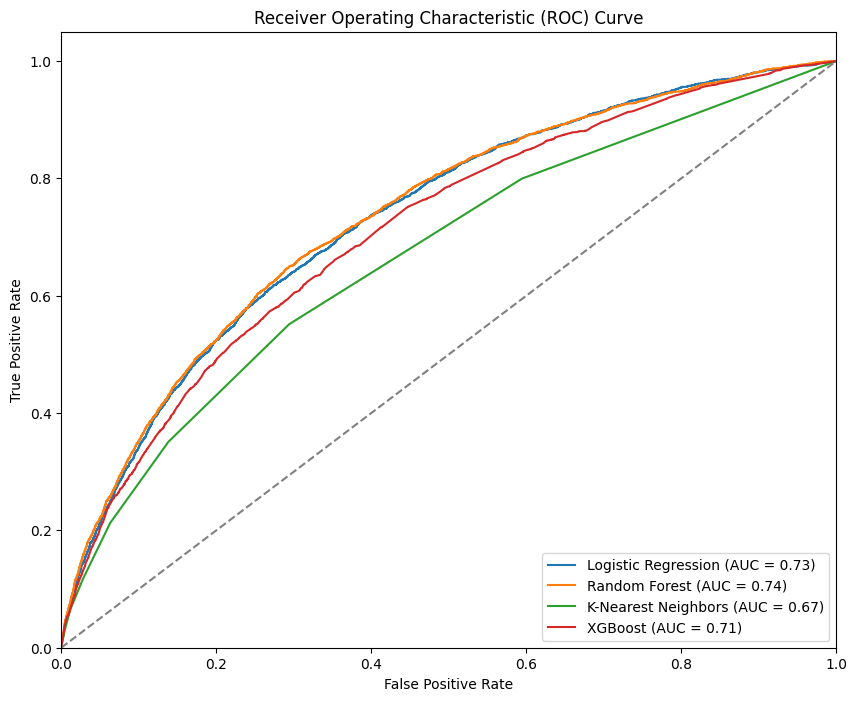

Results for RFE Feature Set:

Logistic Regression Performance:
Accuracy: 0.9183
ROC AUC: 0.7326
CV Mean ROC AUC: 0.7261 (+/- 0.0044)
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36010
           1       0.51      0.01      0.01      3206

    accuracy                           0.92     39216
   macro avg       0.72      0.50      0.48     39216
weighted avg       0.89      0.92      0.88     39216


Random Forest Performance:
Accuracy: 0.9183
ROC AUC: 0.7357
CV Mean ROC AUC: 0.7297 (+/- 0.0040)
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36010
           1       0.53      0.00      0.00      3206

    accuracy                           0.92     39216
   macro avg       0.73      0.50      0.48     39216
weighted avg       0.89      0.92      0.88     39216


K-Nearest Neighbors Performance:
Accuracy: 0.9177
ROC AUC: 0.6670
CV

KeyboardInterrupt: 

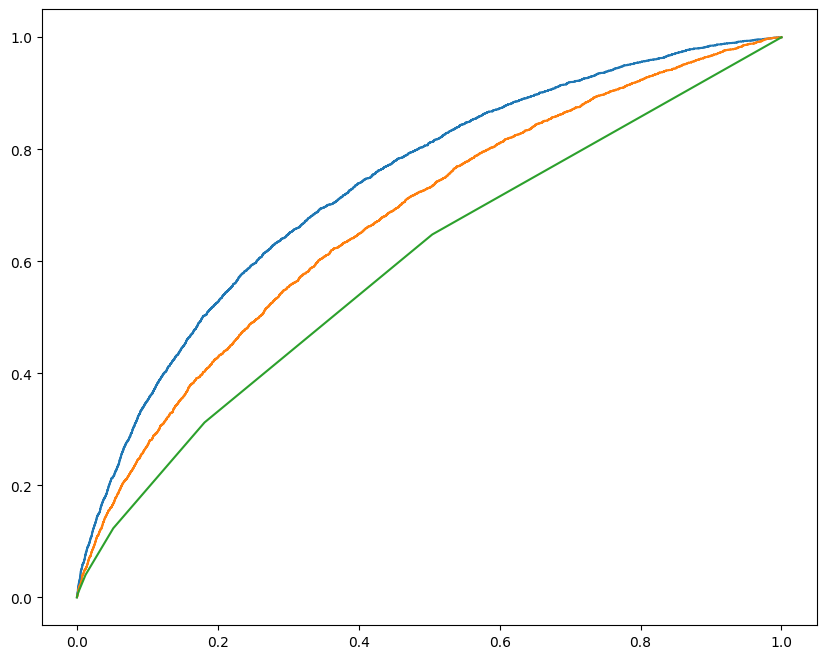

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to train, evaluate, and calculate ROC AUC
def train_and_evaluate(models, X_train, y_train, X_test, y_test, param_distributions=None, cv_folds=5):
    results = {}
    plt.figure(figsize=(10, 8))  # Set up the plot for ROC curves

    for name, model in models.items():
        try:
            print(f"Training {name}...")
            # Use provided parameters if available
            if param_distributions and name in param_distributions:
                model.set_params(**param_distributions[name])  # Set the predefined parameters
            model.fit(X_train, y_train)

            print(f"Evaluating {name}...")
            # Make predictions
            y_pred_prob = model.predict_proba(X_test)[:, 1]  # predict probabilities
            y_pred = model.predict(X_test)

            # Calculate accuracy and ROC AUC
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_prob)  # Calculate ROC AUC

            # Get ROC curve data
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

            # Plot ROC curve for the model
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

            print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
            # Get cross-validation scores
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc')

            # Save results
            results[name] = {
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'CV Mean ROC AUC': np.mean(cv_scores),
                'CV Std ROC AUC': np.std(cv_scores),
                'Classification Report': classification_report(y_test, y_pred)
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

    # Plot the details for the ROC curve
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return results

# Example of model dictionary (you need to define these models)
# models = {
#     'Model1': model1,
#     'Model2': model2,
#     ...
# }

# Train and evaluate models on RFE feature set
results_rfe = train_and_evaluate(models, X_RFE_optimal_train, y_train, X_RFE_optimal_test, y_test, param_distributions_rfe)

# Print results for RFE
print("Results for RFE Feature Set:")
for model_name, metrics in results_rfe.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")  # Print ROC AUC
    print(f"CV Mean ROC AUC: {metrics['CV Mean ROC AUC']:.4f} (+/- {metrics['CV Std ROC AUC']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")

# Train and evaluate models on PCA feature set
results_pca = train_and_evaluate(models, X_RFE_pca_train, y_train, X_RFE_pca_test, y_test, param_distributions_pca)

# Print results for PCA
print("\nResults for PCA Feature Set:")
for model_name, metrics in results_pca.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")  # Print ROC AUC
    print(f"CV Mean ROC AUC: {metrics['CV Mean ROC AUC']:.4f} (+/- {metrics['CV Std ROC AUC']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming the data is already loaded
# X_RFE_train, X_RFE_test, X_RFE_pca_train, X_RFE_pca_test, y_train, y_test, and y_target are already defined

# Function to perform randomized hyperparameter search and model evaluation
def train_and_evaluate(models, X_train, y_train, X_test, y_test, param_distributions=None, cv_folds=5):
    results = {}
    for name, model in models.items():
        try:
            # Perform hyperparameter search if parameters are provided
            if param_distributions and name in param_distributions:
                random_search = RandomizedSearchCV(model, param_distributions[name], n_iter=25, cv=cv_folds,
                                                   scoring='accuracy', random_state=42, n_jobs=-1)
                random_search.fit(X_train, y_train)
                best_model = random_search.best_estimator_
                print(f"Best hyperparameters for {name}: {random_search.best_params_}")
            else:
                best_model = model
                best_model.fit(X_train, y_train)

            # Make predictions
            y_pred = best_model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Get cross-validation scores
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_folds, scoring='accuracy')

            # Save results
            results[name] = {
                'Accuracy': accuracy,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Accuracy': np.std(cv_scores),
                'Classification Report': classification_report(y_test, y_pred)
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

    return results


# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

# Define parameter distributions for hyperparameter tuning
param_distributions = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [25, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2]
      },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [25, 50, 100],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
}

#
#
#
#
#Best hyperparameters for Logistic Regression: {'solver': 'lbfgs', 'C': 100}
#Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
#Best hyperparameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 15, 'leaf_size': 30, 'algorithm': 'ball_tree'}
#Best hyperparameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


# Train and evaluate models on RFE feature set
results_rfe = train_and_evaluate(models, X_RFE_optimal_train, y_train, X_RFE_optimal_test, y_test, param_distributions)

# Print results for RFE
print("Results for RFE Feature Set:")
for model_name, metrics in results_rfe.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"CV Mean Accuracy: {metrics['CV Mean Accuracy']:.4f} (+/- {metrics['CV Std Accuracy']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")

# Train and evaluate models on PCA feature set
results_pca = train_and_evaluate(models, X_RFE_pca_train, y_train, X_RFE_pca_test, y_test, param_distributions)

# Print results for PCA
print("Results for PCA Feature Set:")
for model_name, metrics in results_pca.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"CV Mean Accuracy: {metrics['CV Mean Accuracy']:.4f} (+/- {metrics['CV Std Accuracy']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")

# Visualize results: Compare accuracies between RFE and PCA models
rfe_accuracies = [metrics['Accuracy'] for metrics in results_rfe.values()]
pca_accuracies = [metrics['Accuracy'] for metrics in results_pca.values()]

# Plot the comparison of accuracies
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
ind = np.arange(len(models))  # the x locations for the groups

rects1 = ax.bar(ind - width/2, rfe_accuracies, width, label='RFE')
rects2 = ax.bar(ind + width/2, pca_accuracies, width, label='PCA')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison: RFE vs PCA')
ax.set_xticks(ind)
ax.set_xticklabels(models.keys())
ax.legend()

plt.tight_layout()
plt.show()

# Visualize the classification report comparison (optionally)


In [ ]:
# Function to perform randomized hyperparameter search and model evaluation
def train_and_evaluate(models, X_train, y_train, X_test, y_test, param_distributions=None, cv_folds=5):
    results = {}
    for name, model in models.items():
        try:
            # Perform hyperparameter search if parameters are provided
            bayes_search = None
            if param_distributions and name in param_distributions:
                bayes_search = BayesSearchCV(model, param_distributions[name], n_iter=50, cv=cv_folds, random_state=42)
                bayes_search.fit(X_train, y_train)
                best_model = bayes_search.best_estimator_
                print(f"Best hyperparameters for {name}: {bayes_search.best_params_}")
            else:
                best_model = model
                best_model.fit(X_train, y_train)

            # Make predictions
            y_pred = best_model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Get cross-validation scores
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_folds, scoring='accuracy')

            # Save results
            results[name] = {
                'Accuracy': accuracy,
                'CV Mean Accuracy': np.mean(cv_scores),
                'CV Std Accuracy': np.std(cv_scores),
                'Classification Report': classification_report(y_test, y_pred),
                'Best Hyperparameters': bayes_search.best_params_ if bayes_search else None,
                'Model': best_model
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

    return results


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import Memory

# Define cache directory
cache_dir = './pipeline_cache'
memory = Memory(location=cache_dir, verbose=0)
# prompt: make another where target variable TARGET is excluded

df = pd.read_csv('application_train.csv')

X = df.drop('TARGET', axis=1)
y = df['TARGET']

param_distributions_rfe = {
    'Logistic Regression': {
        'C': 100,
        'max_iter': 500,
        'solver': 'lbfgs'
    },
    'Random Forest': {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 10,
        'min_samples_leaf': 1
    },
    'K-Nearest Neighbors': {
        'n_neighbors': 15,
        'weights': 'uniform',
        'algorithm': 'ball_tree',
        'leaf_size': 30
    },
    'XGBoost': {
        'subsample': 1.0,
        'n_estimators': 50,
        'max_depth': 3,
        'learning_rate': 0.01,
        'gamma': 0.1,
        'colsample_bytree': 0.8
    }
}

param_distributions_pca = {
    'Logistic Regression': {
        'C': 0.001,
        'max_iter': 500,
        'solver': 'lbfgs'
    },
    'Random Forest': {
        'n_estimators': 50,
        'max_depth': 20,
        'min_samples_split': 5,
        'min_samples_leaf': 2
    },
    'K-Nearest Neighbors': {
        'n_neighbors': 10,
        'weights': 'uniform',
        'algorithm': 'ball_tree',
        'leaf_size': 40
    },
    'XGBoost': {
        'subsample': 1.0,
        'n_estimators': 100,
        'max_depth': 3,
        'learning_rate': 0.1,
        'gamma': 0.2,
        'colsample_bytree': 0.8
    }
}
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}


# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


# Preprocessing and transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
], memory=memory)  # Enable caching

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
], memory=memory)  # Enable caching

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



# Create pipelines with caching enabled
def create_pipelines():
    pre_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
    ], memory=memory)  # Enable caching

    smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
    ], memory=memory)  # Enable caching

    rfe_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=LogisticRegression(max_iter=200, random_state=42), n_features_to_select=10)),
    ], memory=memory)
    pca_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('dim_reduction', PCA(n_components=71, random_state=42)),
    ], memory=memory)

    rfe_smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', RFE(estimator=LogisticRegression(max_iter=200, random_state=42), n_features_to_select=10)),
    ], memory=memory)  # Enable caching

    pca_smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('dim_reduction', PCA(n_components=71, random_state=42)),
    ], memory=memory)  # Enable caching

    return {
        "Preprocessing": pre_pipeline,
        "SMOTE": smote_pipeline,
        "RFE": rfe_pipeline,
        "PCA": pca_pipeline,
        "RFE_SMOTE": rfe_smote_pipeline,
        "PCA_SMOTE": pca_smote_pipeline
        }

# Model evaluation function
def evaluate_pipelines(models, pipelines, X_train, y_train, X_test, y_test):
    results = {}
    plt.figure(figsize=(12, 10))

    for pipeline_name, pipeline in pipelines.items():
        for model_name, model in models.items():
            print(f"Training {model_name} with {pipeline_name} pipeline...")

            # Add the classifier in the pipeline with the specific model
            # Perform Bayesian search if parameters are provided
            bayes_search = None
            best_model = None
            if param_distributions and model_name in param_distributions:
                bayes_search = BayesSearchCV(
                    model,
                    param_distributions[model_name],
                    n_iter=50,
                    cv=5,
                    random_state=42
                )
                pipeline_with_model = ImbPipeline(steps=pipeline.steps + [('classifier', bayes_search)], memory=memory)
                pipeline_with_model.fit(X_train, y_train)
                best_model = bayes_search.best_estimator_
                print(f"Best hyperparameters for {model_name}: {bayes_search.best_params_}")
            else:
                pipeline_with_model = ImbPipeline(steps=pipeline.steps + [('classifier', model)], memory=memory)
                pipeline_with_model.fit(X_train, y_train)
                best_model = model

            # Fit the pipeline
            pipeline.fit(X_train, y_train)

            print(f"Evaluating {model_name} with {pipeline_name} pipeline...")
            # Predictions and metrics
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
            y_pred = pipeline.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_prob)
            print(f"{model_name} with {pipeline_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))

            # Cross-validation

            # Store results
            key = f"{model_name}_{pipeline_name}"
            results[key] = {
                "Accuracy": accuracy,
                "ROC AUC": roc_auc,
                #"CV Mean ROC AUC": np.mean(cv_scores),
                #"CV Std ROC AUC": np.std(cv_scores),
                "Classification Report": classification_report(y_test, y_pred)
            }

            # Plot ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{key} (AUC = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Models and Pipelines')
    plt.legend(loc='lower right')
    plt.show()

    return results


# Create pipelines
pipelines = create_pipelines()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate models with pipelines
results = evaluate_pipelines(models, pipelines, X_train, y_train, X_test, y_test)

# Print results
for key, metrics in results.items():
    print(f"\n{key} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
#    print(f"CV Mean ROC AUC: {metrics['CV Mean ROC AUC']:.4f} (+/- {metrics['CV Std ROC AUC']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Training Logistic Regression with RFE pipeline...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from os import pipe
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import Memory

# Define cache directory
cache_dir = './pipeline_cache'
memory = Memory(location=cache_dir, verbose=0)
# prompt: make another where target variable TARGET is excluded

df = pd.read_csv('application_train.csv')

X = df.drop('TARGET', axis=1)
y = df['TARGET']

from skopt.space import Real, Integer, Categorical

param_distributions = {
    'Logistic Regression': {
        'C': Real(1e-5, 100, prior='log-uniform'),
        'max_iter': Integer(50, 2000),
        'solver': Categorical(['lbfgs', 'saga', 'liblinear', 'newton-cg']),
        'penalty': Categorical(['elasticnet', 'l2', 'l1', None])
    },
    'Random Forest': {
        'n_estimators': Integer(5, 500),
        'max_depth': Integer(5, 100),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10),
        'bootstrap': Categorical([True, False]),
        'max_features': Categorical(['auto', 'sqrt', 'log2', None])
    },
    'K-Nearest Neighbors': {
        'n_neighbors': Integer(1, 200),
        'weights': Categorical(['uniform', 'distance']),
        'leaf_size': Integer(10, 100),
        'p': Integer(1, 5)
    },
    'XGBoost': {
        'subsample': Real(0.3, 1.0),
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(3, 15),
        'learning_rate': Real(0.001, 0.5, prior='log-uniform'),
        'gamma': Real(0, 1.0),
        'colsample_bytree': Real(0.3, 1.0),
        'reg_alpha': Real(0, 10),
        'reg_lambda': Real(0, 10),
        'scale_pos_weight': Real(1, 10)
    }
}

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}


# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


# Preprocessing and transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
], memory=memory)  # Enable caching

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
], memory=memory)  # Enable caching

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



# Create pipelines with caching enabled
def create_pipelines():
    pre_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
    ], memory=memory)  # Enable caching

    smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
    ], memory=memory)  # Enable caching

    rfe_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=LogisticRegression(max_iter=200, random_state=42), n_features_to_select=10)),
    ], memory=memory)

    pca_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('dim_reduction', PCA(n_components=71, random_state=42)),
    ], memory=memory)

    rfe_smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', RFE(estimator=LogisticRegression(max_iter=200, random_state=42), n_features_to_select=10)),
    ], memory=memory)  # Enable caching

    pca_smote_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('dim_reduction', PCA(n_components=71, random_state=42)),
    ], memory=memory)  # Enable caching

    return {
        "Preprocessing": pre_pipeline,
        "SMOTE": smote_pipeline,
        "RFE": rfe_pipeline,
        "PCA": pca_pipeline,
        "RFE_SMOTE": rfe_smote_pipeline,
        "PCA_SMOTE": pca_smote_pipeline
        }

# Model evaluation function
def evaluate_pipelines(models, pipelines, X_train, y_train, X_test, y_test):
    results = {}
    plt.figure(figsize=(12, 10))

    for pipeline_name, pipeline in pipelines.items():
        for model_name, model in models.items():
            print(f"Training {model_name} with {pipeline_name} pipeline...")

            # Add the classifier in the pipeline with the specific model
            # Perform Bayesian search if parameters are provided
            bayes_search = None
            best_model = None
            pipeline_with_model = None
            if param_distributions and model_name in param_distributions:
                print(f"Performing Bayesian search for {model_name}")
                bayes_search = BayesSearchCV(
                    model,
                    param_distributions[model_name],
                    n_iter=50,
                    cv=5,
                    random_state=42
                )
                pipeline_with_model = ImbPipeline(steps=pipeline.steps + [('classifier', bayes_search)], memory=memory)
                pipeline_with_model.fit(X_train, y_train)
                best_model = bayes_search.best_estimator_
                print(f"Best hyperparameters for {model_name}: {bayes_search.best_params_}")
            else:
                print(f"No hyperparameter tuning for {model_name}")
                pipeline_with_model = ImbPipeline(steps=pipeline.steps + [('classifier', model)], memory=memory)
                pipeline_with_model.fit(X_train, y_train)
                best_model = model


            # Fit the pipeline
            pipeline = pipeline_with_model

            print(f"Evaluating {model_name} with {pipeline_name} pipeline...")
            # Predictions and metrics
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
            y_pred = pipeline.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_prob)
            print(f"{model_name} with {pipeline_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))

            # Store results
            key = f"{model_name}_{pipeline_name}"
            results[key] = {
                "Accuracy": accuracy,
                "ROC AUC": roc_auc,
                "Classification Report": classification_report(y_test, y_pred)
            }

            # Plot ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{key} (AUC = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Models and Pipelines')
    plt.legend(loc='lower right')
    plt.show()

    return results


# Create pipelines
pipelines = create_pipelines()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate models with pipelines
results = evaluate_pipelines(models, pipelines, X_train, y_train, X_test, y_test)

# Print results
for key, metrics in results.items():
    print(f"\n{key} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
#    print(f"CV Mean ROC AUC: {metrics['CV Mean ROC AUC']:.4f} (+/- {metrics['CV Std ROC AUC']:.4f})")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Training Logistic Regression with Preprocessing pipeline...
Performing Bayesian search for Logistic Regression


ValueError: l1_ratio must be specified when penalty is elasticnet.

<Figure size 1200x1000 with 0 Axes>

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter

# Generate a synthetic imbalanced dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                            weights=[0.9, 0.1], random_state=42)

# Check initial class distribution
print("Original class distribution:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check class distribution in the training set before SMOTE
print("Training set class distribution before SMOTE:", Counter(y_train))

# Create a pipeline that includes SMOTE and a classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling the minority class
    ('classifier', RandomForestClassifier(random_state=42))  # Example classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Extract resampled dataset after SMOTE
X_res, y_res = pipeline.named_steps['smote'].fit_resample(X_train, y_train)

# Verify the resampled class distribution programmatically
print("Training set class distribution after SMOTE:", Counter(y_res))

# Ensure that both classes have the same number of samples
class_counts = Counter(y_res)
assert len(set(class_counts.values())) == 1, "Classes are not balanced!"

# Print success message
print("Class distribution is balanced.")

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Original class distribution: Counter({0: 897, 1: 103})
Training set class distribution before SMOTE: Counter({0: 671, 1: 79})
Training set class distribution after SMOTE: Counter({0: 671, 1: 671})
Class distribution is balanced.
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       226
           1       0.69      0.75      0.72        24

    accuracy                           0.94       250
   macro avg       0.83      0.86      0.84       250
weighted avg       0.95      0.94      0.94       250



In [ ]:
# prompt: Analyze the results from before

# Assuming results_rfe and results_pca are dictionaries as defined in the previous code
# Example: Accessing the classification report for Logistic Regression after RFE
print(results_rfe['Logistic Regression']['Classification Report'])


# Example: Accessing the accuracy for Random Forest after PCA
print(results_pca['Random Forest']['Accuracy'])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2857
           1       1.00      0.00      0.01       248

    accuracy                           0.92      3105
   macro avg       0.96      0.50      0.48      3105
weighted avg       0.93      0.92      0.88      3105

0.9201288244766506
